#  Document Classification and Subsequent Analysis of COVID-19 in Scientific Publications

## Submitted by: Md. Shihab Ullah

### Import necessary libraries for doing operations 

### Instructions for running this .ipynb file
* Create or open a folder. Let's say the folder name is "X" 
* Save this .ipynb file inside "X"
* Download "comm_use.I-N.xml.tar.gz" and "non_comm_use.I-N.xml.tar.gz" from https://ftp.ncbi.nlm.nih.gov/pub/pmc/oa_bulk/
* Unzip the XML archive inside "X"
* Run the .ipynb file

#### Note:
The .ipynb file and the unzipped XML archive folder must me in the same directory i.e. folder named "X"

In [1]:

import os
import datetime
import xml.dom.minidom
import nltk
nltk.download('all')
import re
import string
from textblob import Word
from collections import Counter
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import itertools
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bc5cdr_md-0.4.0.tar.gz
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_jnlpba_md-0.4.0.tar.gz
import spacy
import en_ner_jnlpba_md
import en_ner_bc5cdr_md
from spacy import displacy
import matplotlib.pyplot as plt

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\christina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\christina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\christina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\christina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\christina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]

[nltk_data]    |   Package reuters is already up-to-date!
[nltk_data]    | Downloading package rte to
[nltk_data]    |     C:\Users\christina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package rte is already up-to-date!
[nltk_data]    | Downloading package semcor to
[nltk_data]    |     C:\Users\christina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package semcor is already up-to-date!
[nltk_data]    | Downloading package senseval to
[nltk_data]    |     C:\Users\christina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package senseval is already up-to-date!
[nltk_data]    | Downloading package sentiwordnet to
[nltk_data]    |     C:\Users\christina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package sentiwordnet is already up-to-date!
[nltk_data]    | Downloading package sentence_polarity to
[nltk_data]    |     C:\Users\christina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package sentence_polarity is already up-to-date!
[nltk_data]    | Downloading package shakespe

[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package perluniprops to
[nltk_data]    |     C:\Users\christina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package perluniprops is already up-to-date!
[nltk_data]    | Downloading package nonbreaking_prefixes to
[nltk_data]    |     C:\Users\christina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nonbreaking_prefixes is already up-to-date!
[nltk_data]    | Downloading package vader_lexicon to
[nltk_data]    |     C:\Users\christina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package vader_lexicon is already up-to-date!
[nltk_data]    | Downloading package porter_test to
[nltk_data]    |     C:\Users\christina\AppData\Roaming\nltk_data...
[nltk_data]    |   Package porter_test is already up-to-date!
[nltk_data]    | Downloading package wmt15_eval to
[nltk_data]    |     C:\Users\christina\AppData\Roaming\nltk_data...
[nltk_data]    |   Pa

You should consider upgrading via the 'C:\Users\christina\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bc5cdr_md-0.4.0.tar.gz (125.1 MB)


You should consider upgrading via the 'C:\Users\christina\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_jnlpba_md-0.4.0.tar.gz (125.1 MB)


### ONE TIME OPERATION 
* Removing all pre-2020 articles as they wont be significant in training the classifier and will mostly be noise data

In [2]:
# path = os.getcwd()
# for root, dirs, files in os.walk(path):
#     for file in files:
#         file_path = os.path.join(root, file)
#         if(file.endswith(".nxml")):
# #             print(file)
#             file_status = os.stat(file_path)
#             if datetime.datetime.fromtimestamp(file_status.st_mtime) < datetime.datetime(2020,1,1):
#                 print(file)
# #                 os.remove(file_path)


### Util functions for getting text of title and abstract from all the  .nxml files in the current directory


In [3]:
def get_all_text(node):
    
    """Get all text recursively from any node and its child if the node type is TEXT_NODE

    Args:
        node (Node Object): Node object to iterate and get text

    Returns:
        str: A string comprised of all the text content of the node and its child (if any)
    """
    
    
    if node.nodeType == node.TEXT_NODE:
        return node.data
    else:
        text_string = ''
        for child_node in node.childNodes:
            text_string += get_all_text(child_node)
        return text_string
    

def getText(nodelist):
    
    """Send node(s) by calling get_all_text on each node 

    Args:
        nodelist (NodeList Object): NodeList object to iterate and get text via get_all_text(Node)

    Returns:
        rc (list): A list comprised of all the text content of the node and its child (if any)
    """
    
    # Iterate all Nodes aggregate TEXT_NODE
    rc = []
    for node in nodelist:
        rc.append(get_all_text(node))
        return ''.join(rc)

    
def get_title_abstract(file_path):
    
    """Get title and abstract from an article

    Args:
        file_path (str): absolute file path of an article 

    Returns:
        title(str): Title of the article (if any)
        abstract_text(str): abstract of the article (if any)
    """
    
    doc = xml.dom.minidom.parse(file_path)
    
    #Check if the title is in tag named "journal-title" 
    #If exception occurs, then check first value of tag named "article-title"
    try:
        title =  getText(doc.getElementsByTagName("journal-title")) or ""
    except IndexError:
        title = doc.getElementsByTagName("article-title")[0].firstChild.nodeValue
    
    #Check if the abstract is in tag named "abstract" 
    #If exception occurs, then check first value of tag named "license-p"
    try:
        abstract = doc.getElementsByTagName("abstract") or ""
    except IndexError:
        abstract = doc.getElementsByTagName("license-p")                

    abstract_text = ""
    # Iterate through nodes for getting abstract as it is comprised of multiple tags
    for node in abstract:
        abstract_text = getText(node.childNodes)
    
    return title, abstract_text

# For debugging purpose 
# get_title_abstract(r'C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Invest_Ophthalmol_Vis_Sci\PMC7427825.nxml')

### List of 55 keywords related to Covid-19 for identifying related articles

#### Reference:
* https://libguides.rcsi.ie/covid19/searchstrategy
* https://www.nps.org.au/glossary
* https://www.everydayhealth.com/coronavirus/coronavirus-glossary-key-terms-about-the-pandemic-explained/
* https://www.tmc.edu/news/2020/05/covid-19-crisis-catalog-a-glossary-of-terms/

In [4]:
covid_keywords = ["anosmia", "community spreading", "acute respiratory stress syndrome", "ards","coronavirus","covid", "covid19", "covid-19", "corona", "dyspnoea", "dyspnea", "dysgeusia","pandemic", "social distancing", "self-isolation", "physical distancing", "quarantine", "contact tracing", "wuhan", "triple-variant","coronavirus infections", "covid 2019", "sars-cov-2", "sars-cov-19", "evere acute respiratory pneumonia outbreak", "severe acute respiratory syndrome coronavirus 2", "novel cov", "avian infectious bronchitis virus", "middle east respiratory syndrome", "cov22", "ncov","sars", "droplet transmission", "flattening the curve", "n95", "ventilator", "covid vaccine", "ppe", "personal protective equipment", "oxygen saturation level", "face mask", "who", "world health organisation", "severe respiratory illness", "hydroxychloroquine", "lockdown","novel coronavirus", "remdesivir", "ivermectin", "incubation period", "person-to-person transmission", "forehead thermometer", "epidemic curve","silent hypoxia", "hypoxia"]

covid_keywords

['anosmia',
 'community spreading',
 'acute respiratory stress syndrome',
 'ards',
 'coronavirus',
 'covid',
 'covid19',
 'covid-19',
 'corona',
 'dyspnoea',
 'dyspnea',
 'dysgeusia',
 'pandemic',
 'social distancing',
 'self-isolation',
 'physical distancing',
 'quarantine',
 'contact tracing',
 'wuhan',
 'triple-variant',
 'coronavirus infections',
 'covid 2019',
 'sars-cov-2',
 'sars-cov-19',
 'evere acute respiratory pneumonia outbreak',
 'severe acute respiratory syndrome coronavirus 2',
 'novel cov',
 'avian infectious bronchitis virus',
 'middle east respiratory syndrome',
 'cov22',
 'ncov',
 'sars',
 'droplet transmission',
 'flattening the curve',
 'n95',
 'ventilator',
 'covid vaccine',
 'ppe',
 'personal protective equipment',
 'oxygen saturation level',
 'face mask',
 'who',
 'world health organisation',
 'severe respiratory illness',
 'hydroxychloroquine',
 'lockdown',
 'novel coronavirus',
 'remdesivir',
 'ivermectin',
 'incubation period',
 'person-to-person transmission

### Get Sentiment of an article based on title and abstract

In [5]:
def get_sentiment(title, abstract):   
    """Label a string comprised of both title and abstract Positive or Negative

    Args:
        title (str): title of an article
        abstract (str): all abstract texts of an article

    Returns:
        bool : 1 means Positive, 0 means Negative
    """
          
    total_string = (title + " " + abstract).lower()
    print(total_string)
    sentiment = [ele for ele in covid_keywords if ele in total_string]
    print(sentiment)
    
    return 1 if bool(sentiment) == True else 0

# For Debugging purpose
#print(get_sentiment('IBRO Neuroscience Reports', 'he current global pandemic of COVID-19 disease is caused by a novel coronavirus SARS-CoV-2. This typically causes severe respiratory illness, however, as cases have multiplied across the globe, protean manifestations involving multiple organ systems have been described. We report a case of a 35-year-old woman with men'))

### Constructing "Article" object

In [6]:
class Article(object):
    def __init__(self, title, abstract, sentiment):
        self.title = title
        self.abstract = abstract
        self.sentiment = sentiment

## Text and Sentiment Extraction 
### For each article in the current directory and its sub-directories:
* Get absolute file path of the article in given directory
* Extract title and abstract for the article via file path
* Get sentiment of the article from it's title and abstract 
* Create an Article object with the extracted title, abstract and sentiment respectively
* Finally, add the Article object in a list

#### Note:
* **The dataset must be present in the same directory as this jupyter notebook file**
* We can pass list of specific articles to be used as classification dataset by executing *extract_article('folder name of unzipped XML archive', ['Lancet', 'Ind_Health'])*
* The folder of unzipped XML archive must be on the same directory of the jupyter notebook file
* If no parameter is passed on the function, then the function extract all the title, abstract and append sentiment to each articles found in the directory path along with its subdirectories

In [7]:
# Will contain the extracted title, abstract and sentiment for each article
raw_list = []

#Get absolute path of current directory
path = os.getcwd()

def extract_article(xml_unzipped_folder='non_comm_use.I-N.xml', article_list=None):
    """Extract title, abstract and sentiment from article(s) from the list of articles 
        or from all articles in the directories including subdirectories 

    Args:
        xml_unzipped_folder (str) : Folder name of the unzipped xml article archives.
        article_list (list): List of articles. If None, get list of all articles in the directories 
    """
    
    if article_list is None:
        for root, dirs, files in os.walk(path):
            for file in files:
                file_path = os.path.join(root, file)
                if file.endswith('.nxml'):
                    print(file_path)
                    title, abstract = get_title_abstract(file_path)
                    sentiment = get_sentiment(title or "", abstract or "")
                    raw_list.append(Article(title, abstract, sentiment))
    else:
        for article_name in article_list:
            current_path = path + '\\' +xml_unzipped_folder+ '\\' + article_name
            print(current_path)
            if os.path.exists(current_path):
                for root, dirs, files in os.walk(current_path):
                    for file in files:
                        file_path = os.path.join(root, file)
                        if file.endswith('.nxml'):
                            print(file_path)
                            title, abstract = get_title_abstract(file_path)
                            sentiment = get_sentiment(title or "", abstract or "")
                            raw_list.append(Article(title, abstract, sentiment))
            else:
                print("The article does not exist in the directory") 

#Get extract title, abstract and sentiment of all articles in the main directory
extract_article()

#Get extract title, abstract and sentiment of all articles in the list of Articles
# extract_article('non_comm_use.I-N.xml', ['Ind_Health', 'Lancet'])

#Get extract title, abstract and sentiment of all articles in an article
# extract_article('non_comm_use.I-N.xml', ['Lung'])

C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ibis_(Lond_1859)\PMC7165516.nxml
the ibis summary
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ibis_(Lond_1859)\PMC7165806.nxml
the ibis the norwegian greylag goose anser anser population has been increasing steadily over the past few decades, causing increasing nuisance in terms of agricultural crop damage. this, in combination with the importance of greylags as a hunting target, has called for demographic estimates for the population to assist in management decisions. to this end, we analysed long‐term mark–recapture data using cormack–jolly‐seber models embedded in program mark to obtain survival estimates for the population. no sex‐specific difference, or age effect on survival after juveniles had completed their first migration (3 months of age), was evident. mean first‐year survival was reported as 0.485 and annual survival of older birds as 0.700. on a monthly basis, survival in greylag

ibro reports modern neuroscience utilizes transgenic techniques extensively to study the activity and function of brain neural networks. a key feature of this approach is its compatibility with molecular methods for selective transgene expression in neuronal circuits of interest. until now, such targeted transgenic approaches have not been applied to the extensive circuitry involving the neuropeptide, relaxin-3. pharmacological and gene knock-out studies have revealed relaxin-3 signalling modulates interrelated behaviours and cognitive processes, including stress and anxiety, food and alcohol consumption, and spatial and social memory, highlighting the potential of this system as a therapeutic target. in the present study, we aimed to identify a promoter sequence capable of regulating cell-type specific transgene expression from an adeno-associated viral (aav) vector in relaxin-3 neurons of the rat nucleus incertus (ni). in parallel to relaxin-3 promoter sequences, we also tested an aa

ibro reports to evaluate the acute effects of ingestion of 500 mg of caffeine in addition to aerobic exercise on the optimization of cognitive attention tasks and simple reaction time. twenty men were randomly divided into two groups, caffeine (caf) and placebo (pla), and underwent cardiopulmonary exercise testing and cognitive testing (d2slk, d2gz, d2f% and trs). then, both ingested 500 mg of caffeine or placebo (double blind), and after 60 min performed a 30-minute continuous exercise session at 70 % vo2max. cognitive tests were repeated immediately after exercise, and after 30 min. d2slk, d2gz, d2f% and trs scores were compared by repeated measures anova. the magnitude of the effect was established, and it was considered meaningful p = 0.05. caf is able to alter d2slk and also reduce d2f% (0.001 - moderate effect, 0.82) and improve the task after 30 min of exercise (p = 0.014 - moderate effect 0.95). the trs showed significant gains for the caf group compared to pla (0.000 - high ef

ibro reports vanadium, a transition series metal released during some industrial activities, induces oxidative stress and lipid peroxidation. ameliorative effect of a pure compound from the methanolic extract of moringa oleifera leaves, code-named mimo2, in 14-day old mice administered with vanadium (as sodium metavanadate 3 mg/kg) for 2 weeks was assessed. results from body weight monitoring, muscular strength, and open field showed slight reduction in body weight and locomotion deficit in vanadium-exposed mice, ameliorated with mimo2 co-administration. degeneration of the purkinje cell layer and neuronal death in the hippocampal ca1 region were observed in vanadium-exposed mice and both appeared significantly reduced with mimo2 co-administration. demyelination involving the midline of the corpus callosum, somatosensory and retrosplenial cortices was also reduced with mimo2. microglia activation and astrogliosis observed through immunohistochemistry were also alleviated. immunohistoch

ibro reports this study investigated the impact of a brief meditation workshop on a sample of 223 novice meditators. participants attended a three-day workshop comprising daily guided seated meditation sessions using music without vocals that focused on various emotional states and intentions (open focus). based on the theory of integrative consciousness, it was hypothesized that altered states of consciousness would be experienced by participants during the meditation intervention as assessed using electroencephalogram (eeg). brainwave power bands patterns were measured throughout the meditation training workshop, producing a total of 5616 eeg scans. changes in conscious states were analysed using pre-meditation and post-meditation session measures of delta through to gamma oscillations. results suggested the meditation intervention had large varying effects on eeg spectra (up to 50 % increase and 24 % decrease), and the speed of change from pre-meditation to post-meditation state of 

ichthyological research a taxonomic review of the waspfish genus neocentropogon matsubara 1943 (tetrarogidae), diagnosed by the following combination of characters: body sparsely covered with small embedded cycloid scales, palatine teeth present, xiii–xvi dorsal-fin spines, the first dorsal fin originating above the orbit, five pelvic-fin soft rays, and membrane of lower four pectoral-fin rays deeply incised, resulted in the recognition of six species: neocentropogon aeglefinus (weber 1913), neocentropogon affinis (lloyd 1909a), neocentropogon japonicus matsubara 1943, neocentropogon mesedai klausewitz 1985, neocentropogon profundus (smith 1958), and neocentropogon trimaculatus chan 1966. neocentropogon trimaculatus (anti-tropically distributed in east asia and australia) can be distinguished from its congeners by the presence of three dark blotches on the body (vs. absent or a single blotch); n. affinis (eastern indian ocean) and n. aeglefinus (philippines to australia) differ from ot

ict systems security and privacy protection although the general data protection regulation (gdpr) defines several potential legal bases for personal data processing, in many cases data controllers, even when they are located outside the european union (eu), will need to obtain consent from eu citizens for the processing of their personal data. unfortunately, existing approaches for obtaining consent, such as pages of text followed by an agreement/disagreement mechanism, are neither specific nor informed. in order to address this challenge, we introduce our consent request user interface (cure) prototype, which is based on the gdpr requirements and the interpretation of those requirements by the article 29 working party (i.e., the predecessor of the european data protection board). the cure prototype provides transparency regarding personal data processing, more control via a customization, and, based on the results of our usability evaluation, improves user comprehension with respect 

ict systems security and privacy protection data confidentiality is put at risk on cloud platforms where multiple tenants share the underlying hardware. as multiple workloads are executed concurrently, conflicts in memory resource occur, resulting in observable timing variations during execution. malicious tenants can intentionally manipulate the hardware platform to devise a covert channel, enabling them to steal the data of co-residing tenants. this paper presents two new microarchitectural covert channel attacks using the memory controller. the first attack allows a privileged adversary (i.e. process) to leak information in a native environment. the second attack is an extension to cross-vm scenarios for unprivileged adversaries. this work is the first instance of leakage channel based on the memory controller. as opposed to previous denial-of-service attacks, we manage to modulate the load on the channel scheduler with accuracy. both attacks are implemented on cross-core configurat

idcases vaginal cystic lesions are rare incidental findings detected during physical examination and imaging. to our knowledge, filariasis as a cause of vaginal cystic lesions has not been previously reported in the english literature. we present vaginal cystic lesion which posed diagnostic dilemma and was confirmed on cytology to being filarial in etiology. the patient was treated with single-dose of oral diethylcarbamazine and the lesion subsided on follow up scans at three months thus avoiding inadvertent surgeries.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\IDCases\PMC6872861.nxml
idcases we present a case of a generally healthy, immunocompetent, 57 year old male on hiv pre-exposure prophylaxis (prep) who developed the sudden onset of right wrist pain and swelling with associated left second finger tenosynovitis, due to a disseminated gonococcal infection (dgi) with purulent arthritis. this case’s aim is to demonstrate a well-documented but infrequently 

idcases increasing reports have noted an increased prevalence of lung cancer in human immunodeficiency virus (hiv)-positive patients with poor prognosis. a 51-year-old hiv-positive man was diagnosed with stage iv squamous cell lung cancer. he had high grade spike intermittent fever and persistent elevation of the white blood cell count as well as c-reactive protein (crp) levels. although we suspected opportunistic infections, we did not detect any infection. the autopsy showed positive immunostaining for interleukin-6 (il-6) in plasma cells of the stromal regions and g-csf in tumor cells, which were considered responsible for his significant tumor fever, leukocytosis and high titers of crp. this case report highlights the need to consider cytokine-producing tumor as a differential diagnosis of fever and high inflammatory status in hiv-positive cancer patients.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\IDCases\PMC6970164.nxml
idcases the incidence of invasiv

idcases acute primary peritonitis due to group a streptococci (gas) is a rare but life-threatening disease most often seen in case of liver cirrhosis or nephrotic syndrome. the specific mechanism of this infection remains unknown and according to the literature hematogenous, lymphatic, retrograde inoculation from the genitourinary tract and translocation of intestinal tract flora have all been proposed. we report a case of a 37-year-old previously healthy patient who presented to the emergency, four days after vaginal delivery, with abdominal pain and septic shock. acute peritonitis was diagnosed and peritoneal and blood culture revealed group a streptococci. unfortunately, the patient died within 12 h despite adequate resuscitation and antimicrobials. the present case report highlights the importance of an early diagnosis with an adequate therapy in case of gas peritonitis after vaginal delivery.
['who']
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\IDCases\PMC70

idcases fungi from the order entomophthorales are rare but well recognized cause of tropical fungal infection, typically causing subcutaneous truncal or limb lesions in immunocompetent hosts. they may also mimic malignancy by causing intrabdominal mass, sometimes resulting in obstructive gastrointestinal or renal presentations. a 4-year-old female presented with a progressively growing abdominal wall lesion over several months, developing into acute inflammation of the abdominal wall with systemic symptoms. she underwent surgical debridement and fungal culture of subcutaneous tissue was positive for basidiobolus spp with characteristic histopathological findings. treatment with voriconazole followed by itraconazole over a total duration of 6 weeks led to complete resolution.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\IDCases\PMC7093736.nxml
idcases backgroundwe would like to raise awareness about the toxicities related to the added excipients present in the 

idcases borrelia burgdorferi (b. burgdorferi) is a spirochete bacterium that is transmitted via the ixodes tick. infection results in lyme disease with possible cardiac manifestations, which is also known as lyme carditis. patients can present with bradycardia due to rapidly fluctuating atrioventricular block (avb), which is the hallmark of lyme carditis. however, we present a rare case of sick sinus syndrome (sss) without avb in a 47-year-old man with lyme disease. he initially presented with a headache and subsequently developed new onset bradycardia and a right cranial nerve (cn) vi palsy with diplopia. b. burgdorferi enzyme-linked immunosorbent assay (elisa) screen and igm western blot were positive. he was admitted to the intensive care unit. electrocardiography (ekg) indicated a heart rate in the high 30 s beats per minute (bpm) with several pauses, but no avb was present. the patient responded well to therapy, and was discharged with an outpatient regimen of doxycycline. lyme ca

idcases 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\IDCases\PMC7229287.nxml
idcases mucormycosis is a fatal opportunistic fungal infection. rarely it can occur in immunocompetent patients. here, we present a case of colonic mucormycosis in immunocompetent patients.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\IDCases\PMC7229478.nxml
idcases we describe a 42-year old woman, admitted to our department after 15 days of persistence of respiratory failure and treated with infusion of intravenous immunoglobulin with a successful outcome.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\IDCases\PMC7232083.nxml
idcases chronic meningococcemia is a rare manifestation of meningococcal disease, characterized by a period of more than one week of intermittent or continuous fever, arthralgia and skin lesions without meningitis. it can occur both in previously healthy and immunocompromised patients. the gold standard for the 

idcases the syndrome of inappropriate secretion of antidiuretic hormone (siadh) is one of the most common causes of hyponatremia in hospitalized patients. wide spectrum of etiologies associated with hyponatremia pose significant challenges in detecting and treating this disorder. several infectious causes of siadh have been reported; however, hyponatremia associated with siadh and coronavirus disease 2019 (covid-19) was only recently mentioned in a few case reports. we discuss a unique presentation of covid-19, in which the patient presented with acute severe symptomatic hyponatremia thought to be the initial and isolated presentation of sars-cov-2 infection.
['coronavirus', 'covid', 'covid-19', 'corona', 'sars-cov-2', 'sars']
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\IDCases\PMC7264047.nxml
idcases botulism is an acute toxin-mediated neuroparalytic syndrome caused by some clostridium species. it typically presents itself as an acute symmetric descending paral

idcases a female 66 year-old patient, not immunocompromised, was admitted in icu for severe influenza complicated by severe acute respiratory distress syndrome (ards) leading to extra-corporeal membrane oxygenation (ecmo). during icu hospitalization, she developed a disseminated invasive aspergillosis with cerebral access and coronary occlusion which lead to cardiac arrest. despite a successful revascularization procedure, the patient died of refractory shock.
['ards', 'corona']
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\IDCases\PMC7269968.nxml
idcases prosthetic joint infections are a serious complication of prosthetic joint implantations. these infections are generally caused by gram-positive, aerobic pathogens, however anaerobic organisms have been rarely implicated. we describe the case of an adult male who developed a clostridium perfringens prosthetic joint infection four weeks following a right total knee arthroplasty. the patient had recently had a revi

idcases a 40-year-old woman with severe anorexia nervosa was found to have a bilateral pulmonary infection with rare atypical mycobacterium mycobacterium szulgai. of note, she had no preexisting structural lung disease or history of tuberculosis, smoking, or hiv. current data suggest that both impaired cell-mediated immunity and altered respiratory mechanics are risk factors for mycobacterial infection in patients with anorexia nervosa.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\IDCases\PMC7332520.nxml
idcases we provide a review of current literature of native valve candida tropicalis endocarditis.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\IDCases\PMC7332522.nxml
idcases herein, we report a case of breakthrough and persistent bacteremia due to serotype k1 klebsiella pneumoniae in an immunocompetent 53- year-old man. he was diagnosed with pyogenic spondylitis owing to back pain and based on magnetic resonance imaging findings. on

idcases we report two cases of tularemia with different clinical manifestations, both suspected of tick-borne transmission and with near-complete remission of all symptoms within 3 months after antimicrobial treatment. the first patient presented with a classical ulceroglandular manifestation; general malaise, an ulcer and lymphadenopathy, occurring two weeks after a tick bite. diagnosis was established by polymerase chain reaction of a skin biopsy from the ulcer. the second patient presented with a rare systemic manifestation including bacteremia and myocarditis resulting in severe clinical heart failure, pulmonary edema and secondary kidney failure. previous tick bites were elucidated after the bacteremia was discovered. the cases underscore the heterogeneity of manifestations, the diagnostic approach and the importance of thorough medical history including recent exposures especially in cases with infection of unknown origin.
[]
C:\Users\christina\Documents\TextMiningProject\non_com

idcases infective endocarditis (ie) caused by aerococcus urinae is rare. the true incidence rate of this pathogen is likely underestimated as this is easily misidentified as staphylococci or streptococci. it is also associated with increased risk of complications such as systemic emboli. aerococcus usually affects elderly males with underlying urological conditions. here we present a case of ie with this rare aerococcus urinae in a young man with a bioprosthetic aortic valve, despite negative urine cultures.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\IDCases\PMC7452663.nxml
idcases 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\IDCases\PMC7452905.nxml
idcases scedosporium apiospermum is ubiquitous in the environment and is considered an emerging infection. immunocompromised hosts can have a wide spectrum of diseases ranging from cutaneous to disseminated disease that may involve pulmonary, central nervous system, or bone. disseminate

idcases to describe the ocurrence of bartonella-associated neuroretinitis secondary to non-feline pet exposure, we retrospectively reviewed medical records and imaging from patients with a clinical and serologic diagnosis of bartonella henselae (bh). retinal imaging included color fundus photography, optical coherence tomography (oct) and fluorescein angiography (fa). four eyes of two patients with cat-scratch disease were included in this study, with a mean age of 35 years. the mean follow-up was 13 months, after presentation of infectious neuroretinitis. both patients suffered from bilateral neuroretinitis after direct contact with family pets (ferret and guinea pig). all patients were treated with a long-term systemic antimicrobial therapy. visual acuity in all improved to 20/30 or better at six months. in conclusion, humans may develop cat-scratch disease when they are exposed to bartonella henselae (bh) in the saliva of infected cats or bh-containing flea feces reaching the system

idcases we present a case study of a 26-year-old morbidly obese man with a three-day history of right leg pain and swelling. the swelling was associated with low grade fever. he was alert and conscious upon presentation to the hospital. his physical examination showed gross swelling of the entire right lower limb with no systemic manifestations. there was no discharge and bullae from the swelling area of the leg. he had high blood sugar and was newly diagnosed with type 2 diabetes mellitus. he was diagnosed with necrotizing fasciitis. an intravenous imipenem-cilastatin 500 mg every 6 h together with clindamycin 900 mg every 8 h was started empirically. extensive wound debridement was performed. the swab culture obtained intraoperatively grew pseudomonas aeruginosa. he required an above knee amputation due to worsening infection despite wound debridement. post-operatively, he developed acute kidney injury with severe metabolic acidosis, which required daily hemodialysis. however, the pa

idcases this is a rare case of a 55 year-old immunocompetent female who developed methicillin sensitive staphylococcus aureus sternoclavicular septic arthritis. the infection was not limited to the joint space but extended into adjacent bones and superior mediastinum. however the patient was successfully treated without surgical intervention and preservation of joint function was obtained with only intravenous antibiotic therapy.
['who']
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\IDCases\PMC7758357.nxml
idcases we present a case of a 57-year-old man who underwent bilateral lung transplantation for idiopathic pulmonary fibrosis. his immediately post-operative course was complicated by fever and cardiac arrest. despite supportive care and broad-spectrum antibiotics, he experienced continued clinical decline. autopsy results indicated angioinvasive mucormycosis and coronary arteritis resulting in acute myocardial infarction as the cause of death.
['corona', 'who']

idcases legionella longbeachae pneumonia is much less common than legionella pneumophila pneumonia in most of the world and may evade timely diagnosis in settings that rely primarily on urine antigen testing, which detects legionella pnuemophila serogroup 1 only. it is, however, widely recognized in australia and new zealand, where it is endemic and associated with exposure to compost and potting soils, rather than contaminated water systems as seen with l. pneumophila. l. longbeachae can cause a similar spectrum and severity of illness as l. pneumophila. here we present a case of a 47-year-old man with l. longbeacheae necrotizing pneumonia following exposure to possibly contaminated soil from a wastewater treatment facility. initial presentation included cough, chest pain, and dyspnea, and progressed to hypoxic respiratory failure, tension pneumothorax, and cardiac arrest. l. pneumophila urine antigen was negative, but bronchioalveolar lavage samples grew l. longbeachae on buffered ch

idcases the protozoan cryptosporidium affects the digestive tract of humans and animals. cryptosporidiosis leads to diarrhoea mimicking a cholera-like course with dehydration and may even result in death in immunodeficient patients, as patients with hyper-igm syndrome. we describe a rare case of disseminated cryptosporidium infection in a seven- year-old boy with cd40 l deficiency. during the pre-graft phase, the patient presented an intestinal cryptosporidiosis which became complicated few days later during the aplasia period with a cholangitis and pulmonary cryptosporidiosis. cryptosporidium hominis was identified. after treatment with nitazoxanide and azithromycine the patient was doing well.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\IDCases\PMC8047165.nxml
idcases whipple’s disease (wd), caused by infection with the organism tropheryma whipplei, is a rare disease that classically presents with diarrhea, weight loss, and polyarthralgia. less commonly, wh

ieee journal of translational engineering in health and medicine automatic arrhythmia detection using 12-lead electrocardiogram (ecg) signal plays a critical role in early prevention and diagnosis of cardiovascular diseases. in the previous studies on automatic arrhythmia detection, most methods concatenated 12 leads of ecg into a matrix, and then input the matrix to a variety of feature extractors or deep neural networks for extracting useful information. under such frameworks, these methods had the ability to extract comprehensive features (known as integrity) of 12-lead ecg since the information of each lead interacts with each other during training. however, the diverse lead-specific features (known as diversity) among 12 leads were neglected, causing inadequate information learning for 12-lead ecg. to maximize the information learning of multi-lead ecg, the information fusion of comprehensive features with integrity and lead-specific features with diversity should be taken into ac

iju case reports introductionseveral types of cancers are reported to induce secondary immune thrombocytopenia resembling immune thrombocytopenic purpura‐like syndrome. however, renal cell carcinoma‐induced immune thrombocytopenic purpura is an extremely rare phenomenon.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\IJU_Case_Rep\PMC7292057.nxml
iju case reports introductionprimitive neuroectodermal tumors are small round‐cell tumors – ewing sarcoma family, frequently occurring in the extremities, but rarely in the kidney.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\IJU_Case_Rep\PMC7292058.nxml
iju case reports introductionhorseshoe kidney has unique anatomical features, such as a complex blood supply. we report a patient with renal cell carcinoma in a horseshoe kidney, who underwent tumor resection by robot‐assisted laparoscopic partial nephrectomy based on preoperative three‐dimensional computed tomography.
['who']
C:\Users\christina

iju case reports introductionrichter syndrome refers to the transformation from chronic lymphocytic leukemia to assaultive lymphoma, often a diffuse large b‐cell lymphoma, and has a greatly poor prognosis. richter syndrome is characterized by rapidly growing lymphadenopathy but rarely presents with extra‐nodal involvement, common sites being the digestive tract, lungs, kidneys, and central nervous system. however, richter syndrome with testicular involvement is extremely rare.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\IJU_Case_Rep\PMC7292091.nxml
iju case reports introductionprostate carcinoma is typically diagnosed and treated, and it rarely manifests as cutaneous metastases. we herein report electron radiotherapy for the treatment of cutaneous metastases causing cellulitis, with a durable clinical response achieved.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\IJU_Case_Rep\PMC7292092.nxml
iju case reports introductionpercutaneous

iju case reports introductiontransurethral resection of bladder tumor is widely used in combination with photodynamic diagnosis to treat non‐muscle invasive bladder cancer. we experienced an intriguing case, in which bladder cancer infiltrated into the right ureteral orifice and was resected via photodynamic diagnosis‐assisted transurethral resection involving the oral administration of 5‐aminolevulinic acid.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\IJU_Case_Rep\PMC7292161.nxml
iju case reports introductionprimary urethral cancer is a rare disease accounting for <1% of all urological cancer cases. we encountered a patient with urethral squamous cell carcinoma diagnosed during treatment of a genital abscess.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\IJU_Case_Rep\PMC7292163.nxml
iju case reports introductionin june 2018, enzalutamide began to be sold in a tablet form in japan and germany. we herein report the case of an improveme

iju case reports introductionmen who require intermittent catheterization may be susceptible to balanoposthitis. benzalkonium chloride is commonly used to disinfect reusable catheters, but the concentration of this solution is critical.
['who']
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\IJU_Case_Rep\PMC7924086.nxml
iju case reports introductiongranulocyte colony‐stimulating factor‐producing nonhematopoietic malignancies have poor clinical outcomes.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\IJU_Case_Rep\PMC7924087.nxml
iju case reports introductionwe report a novel perineal urethrostomy procedure for complete loss of anterior urethral tissue.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\IJU_Case_Rep\PMC7924089.nxml
iju case reports introductiona prostatic utricle is a congenital saccular indentation in the prostatic urethra and frequently enlarged in hypospadias patients. we present a case of urinary retenti

image and signal processing the codebook model is one of the popular real-time models for background subtraction to detect moving objects. in this paper, we propose two techniques to adapt the original codebook algorithm to multispectral images: dynamic mechanism and fusion strategy. for each channel, only absolute spectral value is used to calculate the spectral similarity between the current frame pixel and reference average value in the matching process, which can simplify the matching equations. besides, the deciding boundaries are obtained based on statistical information extracted from the data and always adjusting themselves to the scene changes. results demonstrate that with the proposed techniques, we can acquire a comparable accuracy with other methods using the same multispectral dataset for background subtraction.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Image_and_Signal_Processing\PMC7340892.nxml
image and signal processing social media have b

image and signal processing remote applications that deal with speech need the speech signal to be compressed. first, speech coding transforms the continuous waveform into a numerical form. then, the digitized signal is compressed with or without loss of information. this transformation affects the original waveform and degrades performances for further recognition of the speech signal. meanwhile, the transmission is another source of speech degradation. to restore the original “clean” speech, speech enhancement (se) is widely used, and deep learning algorithms are state-of-the-art, nowadays. in this paper, the target application is a remote arabic speech recognition system, and the aim of using se is to improve the accuracy of the speech recognizer. for that purpose, a deep auto encoder (dae) is used. the effect of the dae-based se is studied through different configurations, and the performances are evaluated through accuracy. the results showed an improvement of about 3.17 between t

[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Image_and_Signal_Processing\PMC7340923.nxml
image and signal processing this paper presents a new way to access visual information in museums through tactile exploration, and related techniques to efficiently transform visual data into tactile objects. accessibility to cultural heritage and artworks for people with visual impairments requires the segmentation of images and paintings to extract and classify their contents into meaningful elements which can then be presented through a tactile medium. in this paper, we investigate the feasibility and how to optimize the tactile discovery of an image. first, we study the emergence of image comprehension through tactile discovery, using 3d-printed objects extracted from paintings. later, we present a dynamic force feedback tablet (f2t) used to convey the 2d shape and texture information of objects through haptic feedback. we then explore several image segmentation method

image and signal processing the brain-computer interface consists of connecting the brain with machines using the brainwaves as a mean of communication for several applications that help to improve human life. unfortunately, electroencephalography that is mainly used to measure brain activities produces noisy, non-linear and non-stationary signals that weaken the performances of common spatial pattern (csp) techniques. as a solution, deep learning waives the drawbacks of the traditional techniques, but it still not used properly. in this paper, we propose a new approach based on convolutional neural networks (convnets) that decodes the raw signal to achieve state-of-the-art performances using an architecture based on inception. the obtained results show that our method outperforms state-of-the-art filter bank common spatial patterns (fbcsp) and shallowconvnet on based on the dataset iia of the bci competition iv.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Im

C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Imaging_Brain_Diseases\PMC7120597.nxml
imaging brain diseases viruses can cause meningitis, encephalitis, myelitis, arteritis when affecting the nervous system. viruses are classified as dna viruses and rna viruses. imaging of viral encephalitis is often nonspecific showing focal or diffuse edema (acute infection) or focal atrophy (chronic infection). location of the lesion depends on causative agent, thus, hsv encephalitis displays an almost pathognomonic involvement of the limbic system.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Imaging_Infections\PMC7122386.nxml
imaging infections  infectious diseases are a major cause of morbidity and mortality worldwide and in the usa. overall costs and morbidity are expected to continue to rise due to increasing rates of drug-resistant pathogens, use of invasive techniques such as implants, as well as immunosuppressive and cancer therapies. tomographi

C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Imaging_of_the_Temporomandibular_Joint\PMC7115005.nxml
imaging of the temporomandibular joint for years, the conventional imaging modalities are generally used in dental practice routine. they provide precious information about dentomaxillofacial region; they also have some limitations such as superimpositions, magnifications, distortions, and low-image quality. because of these limitations, some pathologies, calcifications, and anatomical variations may be missed. any findings on a radiographic image which are not related to the research areas of interest could be a description of “incidental findings.” calcifications are one of these incidental findings. they are asymptomatic and also common in tmj images. although most of the calcifications require no treatment, correct identification will reduce further diagnostic assessments. incidental findings on tmj images were rare, while examining images for temporomandibular

imaging science in dentistry purposethis study was conducted to objectively and subjectively compare the accuracy and reliability of 2-dimensional (2d) photography and 3-dimensional (3d) soft tissue imaging.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Imaging_Sci_Dent\PMC7078412.nxml
imaging science in dentistry purposethe aim of this study was to determine the prevalence of incidental findings (ifs) on digital dental panoramic radiographs (dprs) of asymptomatic patients attending a general dental practice.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Imaging_Sci_Dent\PMC7078413.nxml
imaging science in dentistry purposethis study was performed to evaluate the magnitude of artifacts produced by gutta-percha and metal posts on cone-beam computed tomography (cbct) scans obtained with different tube currents and with or without metal artifact reduction (mar).
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Imaging_

imaging science in dentistry purposethis study was performed to assess the accuracy of preoperative cone-beam computed tomography (cbct), when justified for other reasons, in locating the apical foramen and establishing the working length.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Imaging_Sci_Dent\PMC7506091.nxml
imaging science in dentistry purposethis study investigated knowledge, attitudes, and perceptions regarding the future of artificial intelligence (ai) for radiological diagnosis among dental specialists in central india.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Imaging_Sci_Dent\PMC7506092.nxml
imaging science in dentistry purposethis study investigated the prevalence of temporomandibular joint osteoarthritis (tmj-oa) using the research diagnostic criteria for temporomandibular disorders image analysis criteria, assessed the severity of incidental osteoarthritic changes affecting the tmj, and evaluated the correlations 

imaging science in dentistry purposethe detection and exact localization of penetrating foreign bodies are crucial for the appropriate management of patients with dentoalveolar trauma. this study compared the efficacy of cone-beam computed tomography (cbct) and spiral computed tomography (ct) scans for the detection of different foreign bodies composed of 5 frequently encountered materials in 2 sizes. the effect of the location of the foreign bodies on their visibility was also analyzed.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Imaging_Sci_Dent\PMC8007390.nxml
imaging science in dentistry purposethis study was performed to compare the ability of limited- and large-volume cone-beam computed tomography (cbct) to display isthmuses in the apical root canals of mandibular molars.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Imaging_Sci_Dent\PMC8007391.nxml
imaging science in dentistry purposethe purpose of this study was to analyze the

immune network sjögren's syndrome (ss) is a chronic heterogeneous disease that mainly affects exocrine glands, leading to sicca syndromes such as xerostomia. despite the second highest prevalence rate among systemic autoimmune diseases, its pathophysiology remains largely unknown. here we report that skg mice, a cardinal model of th17 cell-mediated arthritis, also develop a secondary form of ss-like disorder upon systemic exposure to purified curdlan, a type of β-glucan. the reduced production of saliva was not caused by focal immune cell infiltrates but was associated with igg deposits in salivary glands. sera from curdlan-injected skg mice contained elevated titers of igg (predominantly igg1), autoantibody to the muscarinic type 3 receptor (m3r) and inhibited carbachol-induced ca2+ signaling in salivary acinar cells. these results suggest that the th17 cells that are elicited in skg mice promote the production of salivary gland-specific autoantibodies including anti-m3r igg; the anti

immune network acute viral infection or vaccination generates highly functional memory cd8 t cells following the ag resolution. in contrast, persistent antigenic stimulation in chronic viral infection and cancer leads to a state of t-cell dysfunction termed t-cell exhaustion. we and other have recently identified a novel subset of exhausted cd8 t cells that act as stem cells for maintaining virus-specific cd8 t cells in a mouse model of chronic lymphocytic choriomeningitis virus infection. this stem cell-like cd8 t-cell subset has been also observed in both mouse and human tumor models. most importantly, in both chronic viral infection and tumor models, the proliferative burst of ag-specific cd8 t cells driven by pd-1-directed immunotherapy comes exclusively from this stem cell-like cd8 t-cell subset. therefore, a better understanding of the mechanisms how cd8 t-cell subsets are regulated during chronic viral infection and cancer is required to improve the current immunotherapies that 

immune network immune checkpoint inhibitors (icis) have been changing the paradigm of cancer treatment. however, immune-related adverse effects (iraes) have also increased with the exponential increase in the use of icis. icis can break up the immunologic homeostasis and reduce t-cell tolerance. therefore, inhibition of immune checkpoint can lead to the activation of autoreactive t-cells, resulting in various iraes similar to autoimmune diseases. gastrointestinal toxicity, endocrine toxicity, and dermatologic toxicity are common side effects. neurotoxicity, cardiotoxicity, and pulmonary toxicity are relatively rare but can be fatal. ici-related gastrointestinal toxicity, dermatologic toxicity, and hypophysitis are more common with anti- ctla-4 agents. ici-related pulmonary toxicity, thyroid dysfunction, and myasthenia gravis are more common with pd-1/pd-l1 inhibitors. treatment with systemic steroids is the principal strategy against iraes. the use of immune-modulatory agents should be

immune network an excessive hyperinflammatory response-caused septic shock is a major medical problem that is associated with pathogenic bacterial infections leading to high mortality rates. the intestinal microbiota and the associated elaborated metabolites such as short chain fatty acid butyrate have been shown to relieve pathogenic bacterial-caused acute inflammation. butyrate can down-regulate inflammation by inhibiting the growth of pathobionts, increasing mucosal barrier integrity, encouraging obligate anaerobic bacterial dominance and decreasing oxygen availability in the gut. butyrate can also decrease excessive inflammation through modulation of immune cells such as increasing functionalities of m2 macrophages and regulatory t cells and inhibiting infiltration by neutrophils. therefore, various approaches can be used to increase butyrate to relieve pathogenic bacterial-caused hyperinflammation. in this review we summarize the roles of butyrate in attenuating pathogenic bacteri

immune network although various studies on predictive markers in the use of pd-1/pd-l1 inhibitors are in progress, only pd-l1 expression levels in tumor tissues are currently used. in the present study, we investigated whether baseline serum levels of il-6 can predict the treatment response of patients with advanced non-small cell lung cancer (nsclc) treated with pd-1/pd-l1 inhibitors. in our cohort of 125 nsclc patients, the objective response rate (orr) and disease control rate (dcr) were significantly higher in those with low il-6 (<13.1 pg/ml) than those with high il-6 (orr 33.9% vs. 11.1%, p=0.003; dcr 80.6% vs. 34.9%, p<0.001). the median progression-free survival was 6.3 months (95% confidence interval [ci], 3.9–8.7) in the low il-6 group, significantly longer than in the high il-6 group (1.9 months, 95% ci, 1.6–2.2, p<0.001). the median overall survival in the low il-6 group was significantly longer than in the high il-6 group (not reached vs. 7.4 months, 95% ci, 4.8–10.0). thu

immune network we tested how adjuvants effect in a cancer vaccine model using an epitope derived from an autoactivation loop of membrane-type protease serine protease 14 (prss14; loop metavaccine) in mouse mammary tumor virus (mmtv)-polyoma middle tumor-antigen (pymt) system and in 2 other orthotopic mouse systems. earlier, we reported that loop metavaccine effectively prevented progression and metastasis regardless of adjuvant types and th types of hosts in tail-vein injection systems. however, the loop metavaccine with freund's complete adjuvant (cfa) reduced cancer progression and metastasis while that with alum, to our surprise, were adversely affected in 3 tumor bearing mouse models. the amounts of loop peptide specific antibodies inversely correlated with tumor burden and metastasis, meanwhile both th1 and th2 isotypes were present regardless of host type and adjuvant. tumor infiltrating myeloid cells such as eosinophil, monocyte, and neutrophil were asymmetrically distributed am

immune network dendritic cells (dcs) are professional antigen-presenting cells (apcs) that initiate both t-cell responses and tolerance. tolerogenic dcs (tdcs) are regulatory dcs that suppress immune responses through the induction of t-cell anergy and tregs. because lactoferrin (lf) was demonstrated to induce functional tregs and has a protective effect against inflammatory bowel disease, we explored the tolerogenic effects of lf on mouse bone marrow-derived dcs (bmdcs). the expression of cd80/86 and mhc class ii was diminished in lf-treated bmdcs (lf-bmdcs). lf facilitated bmdcs to suppress proliferation and elevate foxp3+ induced treg (itreg) differentiation in ovalbumin-specific cd4+ t-cell culture. foxp3 expression was further increased by blockade of the b7 molecule using ctla4-ig but was diminished by additional cd28 stimulation using anti-cd28 ab. on the other hand, the levels of arginase-1 and indoleamine 2,3-dioxygenase-1 (known as key t-cell suppressive molecules) were incre

immune network respiratory syncytial virus (rsv) causes severe pulmonary disease in infants, young children, and the elderly. formalin inactivated rsv (fi-rsv) vaccine trials failed due to vaccine enhanced respiratory disease, but the underlying immune mechanisms remain not fully understood. in this study, we have used wild type c57bl/6 and cd4 knockout (cd4ko) mouse models to better understand the roles of the cd4 t cells and cellular mechanisms responsible for enhanced respiratory disease after fi-rsv vaccination and rsv infection. less eosinophil infiltration and lower pro-inflammatory cytokine production were observed in fi-rsv vaccinated cd4ko mice after rsv infection compared to fi-rsv vaccinated c57bl/6 mice. nk cells and cytokine-producing cd8 t cells were recruited at high levels in the airways of cd4ko mice, correlating with reduced respiratory disease. depletion studies provided evidence that virus control was primarily mediated by nk cells whereas cd8 t cells contributed to

immune network coronavirus disease 2019 (covid-19) has developed as a pandemic, and it created an outrageous effect on the current healthcare and economic system throughout the globe. to date, there is no appropriate therapeutics or vaccines against the disease. the entire human race is eagerly waiting for the development of new therapeutics or vaccines against severe acute respiratory syndrome coronavirus-2 (sars-cov-2). efforts are being taken to develop vaccines at a rapid rate for fighting against the ongoing pandemic situation. amongst the various vaccines under consideration, some are either in the preclinical stage or in the clinical stages of development (phase-i, -ii, and -iii). even, phase-iii trials are being conducted for some repurposed vaccines like bacillus calmette–guérin, polio vaccine, and measles-mumps-rubella. we have highlighted the ongoing clinical trial landscape of the covid-19 as well as repurposed vaccines. an insight into the current status of the available a

immunity there are great interest and demand for the development of vaccines to prevent and treat diverse microbial infections. mucosal vaccines elicit immune protection by stimulating the production of antibodies at mucosal surfaces and systemic districts. being positioned in close proximity to a large community of commensal microbes, the mucosal immune system deploys a heterogeneous population of cells and a complex regulatory network to maintain the balance between surveillance and tolerance. a successful mucosal vaccine relies on leveraging the functions of these immune cells and regulatory components. we review the important cellular interactions and molecular pathways underlying the induction and regulation of mucosal antibody responses and discuss their implications on mucosal vaccination.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Immunity\PMC3303224.nxml
immunity resting naive cd8+ t cells have an astounding capacity to react to pathogens by massive

immunity dysregulation of microbiota-related immunological processes affects the onset of asthma, its clinical characteristics, and responses to treatment. finlay et al. review connections between gut and lungs microbiota and its influence on allergic airway inflammation. this review covers not only the most well-known populations of microbes in the context of asthma—bacteria—but also discusses viruses, fungi, and archaea.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Immunity\PMC7128463.nxml
immunity the cytosolic receptor rig-i initiates immune responses against most rna viruses by detecting viral rna. schlee and colleagues report that a conserved amino acid in the rna binding pocket prevents recognition of endogenous rna bearing a n1-2′o-methyl group as a marker of “self” and that flaviviruses exploit this tolerance mechanism for immunoescape.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Immunity\PMC7128466.nxml
immunity malaria is 

immunity while nucleic acid sensors are an established part of innate immunity, we are still learning how these sensors can discriminate non-self and pathologically altered self nucleic acids from their physiological counterparts in order to identify pathogens, dyshomeostasis, and damage. here, bartok and hartmann review recent advances in our understanding of this highly coordinated system of innate immune sensors, antiviral restriction factors, and nucleases, now termed nucleic acid immunity.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Immunity\PMC7362799.nxml
immunity loss of il-17a, the signature cytokine of autoreactive th17 cells, unexpectedly did not diminish the pathogenicity of th17 cells in neuroinflammatory disease. this report demonstrates that il-17a represses the th17 cytokine program, primarily il-17f and gm-csf, by inducing autocrine production of il-24. thus, il-17a has a dual role in th17 cells: pathogenic as well as regulatory.
[]
C:\Users\

immunity neurological manifestations associated with covid-19 (neuro-covid) are recognized but under-studied. using single-cell transcriptomics, heming et al. identify expansion of dedifferentiated monocytes and exhausted cd4+ t cells in the cerebral spinal fluid of neuro-covid patients. this work provides a basis for improved understanding of the neurological sequelae associated with covid-19.
['covid', 'covid-19']
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Immunity\PMC7834198.nxml
immunity t cell responses have been demonstrated in covid-19 patients, but ex vivo phenotypes and functions of sars-cov-2-specific t cells remain unclear. rha et al. examined sars-cov-2-specific cd8+ t cells in acute and convalescent covid-19 patients using mhc class i multimers, finding that pd-1-expressing sars-cov-2-specific cd8+ t cells are not exhausted but functional.
['covid', 'covid-19', 'sars-cov-2', 'sars']
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xm

immunobiology leishmaniasis is a parasitic disease that courses with cutaneous or visceral clinical manifestations. the amastigote stage of the parasite infects phagocytes and modulates the effector function of the host cells. our group has described that the interaction between leishmania and immature monocyte-derived dendritic cells (dcs) takes place through dendritic cell-specific icam-3-grabbing nonintegrin (dc-sign), a c-type lectin that specifically recognizes fungal, viral and bacterial pathogens. the dc-sign-mediated recognition of leishmania amastigotes does not induce dc maturation, and the dc-sign ligand/s on leishmania parasites is/are still unknown. we have also found that the dc-sign-related molecule l-sign, specifically expressed in lymph node and liver sinusoidal endothelial cells, acts as a receptor for l. infantum, the parasite responsible for visceral leishmaniasis, but does not recognize l. pifanoi, which causes the cutaneous form of the disease. therefore, dc-sign 

immunobiology resistance of mice to mouse hepatitis virus type 3 (mhv3) infection is genetically determined. normal adult a/j mice are resistant, and balb/c mice are susceptible. higher titers of virus and interferon (ifn) in vivo were found in mhv3-infected balb/c mice compared with a/j mice. in vitro activation of macrophages (mф) by lipopolysaccharide (lps) delayed mhv3 replication only in cells that originated from a/j mice, although cell populations from both a/j, and balb/c mice were able to synthesize comparable amounts of ifn-α/β. using specific antibodies, we have shown that the delayed mhv3 replication in lps-activated a/j mф was due, in part, to ifn-α/β. a/j mф were found to be more sensitive to ifn-γ than to ifn-α/β, and balb/c mф did not develop an antiviral state to either ifn. cultured spleen cells from a/j mice synthesized more ifn-γ than balb/c spleen cells after specific or non-specific stimulation. the results indicate that ifn-activated mф may play a crucial role in

immunobiology the current coronavirus pandemic, covid-19, is the third outbreak of disease caused by the coronavirus family, after severe acute respiratory syndrome and middle east respiratory syndrome. it is an acute infectious disease caused by severe acute respiratory syndrome coronavirus 2 (sars-cov-2). this severe disease is characterised by acute respiratory distress syndrome, septic shock, metabolic acidosis, coagulation dysfunction, and multiple organ dysfunction syndromes. currently, no drugs or vaccines exist against the disease and the only course of treatment is symptom management involving mechanical ventilation, immune suppressants, and repurposed drugs. the severe form of the disease has a relatively high mortality rate. the last six months have seen an explosion of information related to the host receptors, virus transmission, virus structure-function relationships, pathophysiology, co-morbidities, immune response, treatment and the most promising vaccines. this review 

immunogenetics the major histocompatibility complex class i gene repertoire was investigated in a large panel of rhesus macaques of chinese origin. as observed in indian animals, subjects of chinese derivation display mamu-b gene copy number variation, and the sum of expressed genes varies among haplotypes. in addition, these genes display differential transcription levels. the majority of the mamu-b alleles discovered during this investigation appear to be unique for the population studied. only one particular mamu-b haplotype is shared between indian and chinese animals, and it must have been present in the progenitor stock. hence, the data highlight the fact that most allelic polymorphism, and most of the mamu-b haplotypes themselves, are of relatively recent origin and were most likely generated after the separation of the indian and chinese rhesus macaque populations.
['ppe']
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Immunogenetics\PMC2493868.nxml
immunog

immunogenetics in animals, the innate immune system is the first line of defense against invading microorganisms, and the pattern-recognition receptors (prrs) are the key components of this system, detecting microbial invasion and initiating innate immune defenses. two families of prrs, the intracellular nod-like receptors (nlrs) and the transmembrane toll-like receptors (tlrs), are of particular interest because of their roles in a number of diseases. understanding the evolutionary history of these families and their pattern of evolutionary changes may lead to new insights into the functioning of this critical system. we found that the evolution of both nlr and tlr families included massive species-specific expansions and domain shuffling in various lineages, which resulted in the same domain architectures evolving independently within different lineages in a process that fits the definition of parallel evolution. this observation illustrates both the dynamics of the innate immune sys

immunogenetics in the small intestine of celiac disease patients, dietary wheat gluten and similar proteins in barley and rye trigger an inflammatory response. while strict adherence to a gluten-free diet induces full recovery in most patients, a small percentage of patients fail to recover. in a subset of these refractory celiac disease patients, an (aberrant) oligoclonal intraepithelial lymphocyte population develops into overt lymphoma. celiac disease is strongly associated with hla-dq2 and/or hla-dq8, as both genotypes predispose for disease development. this association can be explained by the fact that gluten peptides can be presented in hla-dq2 and hla-dq8 molecules on antigen presenting cells. gluten-specific cd4+ t cells in the lamina propria respond to these peptides, and this likely enhances cytotoxicity of intraepithelial lymphocytes against the intestinal epithelium. we propose a threshold model for the development of celiac disease, in which the efficiency of gluten prese

immunogenetics rheumatoid arthritis (ra) is a chronic autoimmune disease affecting 0.5–1% of the population worldwide. the disease has a heterogeneous character, including clinical subsets of anti-citrullinated protein antibody (acpa)-positive and apca-negative disease. although the pathogenesis of ra is poorly understood, progress has been made in identifying genetic factors that contribute to the disease. the most important genetic risk factor for ra is found in the human leukocyte antigen (hla) locus. in particular, the hla molecules carrying the amino acid sequence qkraa, qrraa, or rrraa at positions 70–74 of the drβ1 chain are associated with the disease. the hla molecules carrying these “shared epitope” sequences only predispose for acpa-positive disease. more than two decades after the discovery of hla-drb1 as a genetic risk factor, the second genetic risk factor for ra was identified in 2003. the introduction of new techniques, such as methods to perform genome-wide association

immunogenetics the siv-infected rhesus macaque (macaca mulatta) is the most established model of aids disease systems, providing insight into pathogenesis and a model system for testing novel vaccines. the understanding of cellular immune responses based on the identification and study of major histocompatibility complex (mhc) molecules, including their mhc:peptide-binding motif, provides valuable information to decipher outcomes of infection and vaccine efficacy. detailed characterization of mamu-b*039:01, a common allele expressed in chinese rhesus macaques, revealed a unique mhc:peptide-binding preference consisting of glycine at the second position. peptides containing a glycine at the second position were shown to be antigenic from animals positive for mamu-b*039:01. a similar motif was previously described for the dd mouse mhc allele, but for none of the human hla molecules for which a motif is known. further investigation showed that one additional macaque allele, present in ind

[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Immunogenetics\PMC3894450.nxml
immunogenetics leukocyte immunoglobulin-like receptors (lilr) are cell surface molecules that regulate the activities of myelomonocytic cells through the balance of inhibitory and activation signals. lilr genes are located within the leukocyte receptor complex (lrc) on chromosome 19q13.4 adjacent to kir genes, which are subject to allelic and copy number variation (cnv). lilrb3 (ilt5) and lilra6 (ilt8) are highly polymorphic receptors with similar extracellular domains. lilrb3 contains inhibitory itim motifs and lilra6 is coupled to an adaptor with activating itam motifs. we analysed the sequences of the extracellular immunoglobulin domain-encoding regions of lilrb3 and lilra6 in 20 individuals, and determined the copy number of these receptors, in addition to those of other members of the lilr family. we found 41 polymorphic sites within the extracellular domains of lilrb3 and lilra6.

immunogenetics many medical advancements—including improvements to anti-rejection therapies in transplantation and vaccine development—rely on preclinical studies conducted in cynomolgus macaques (macaca fascicularis). major histocompatibility complex (mhc) class i and class ii genes of cynomolgus macaques are orthologous to human leukocyte antigen complex (hla) class i and class ii genes, respectively. both encode cell-surface proteins involved in cell recognition and rejection of non-host tissues. mhc class i and class ii genes are highly polymorphic, so comprehensive genotyping requires the development of complete databases of allelic variants. our group used pacbio circular consensus sequencing of full-length cdna amplicons to characterize mhc class i and class ii transcript sequences for a cohort of 293 indonesian cynomolgus macaques (icm) in a large, pedigreed breeding colony. these studies allowed us to expand the existing database of macaca fascicularis (mafa) alleles by identi

immunohorizons cd8 t cells are considered important contributors to the immune response against mycobacterium tuberculosis, yet limited information is currently known regarding their specific immune signature and phenotype. in this study, we applied a cell population transcriptomics strategy to define immune signatures of human latent tuberculosis infection (ltbi) in memory cd8 t cells. we found a 41-gene signature that discriminates between memory cd8 t cells from healthy ltbi subjects and uninfected controls. the gene signature was dominated by genes associated with mucosal-associated invariant t cells (maits) and reflected the lower frequency of maits observed in individuals with ltbi. there was no evidence for a conventional cd8 t cell–specific signature between the two cohorts. we, therefore, investigated maits in more detail based on vα7.2 and cd161 expression and staining with an mhc-related protein 1 (mr1) tetramer. this revealed two distinct populations of cd8+vα7.2+cd161+ mai

immunologic concepts in transfusion medicine passive antibody therapies have a long history of use. in the 19th century, antibodies from xenographic sources of polyclonal antibodies were used to treat infections (diphtheria). they were used often as protection from infectious agents and toxins. complications related to their use involved development of immune complexes and severe allergic reactions. as a result, human source plasma for polyclonal antibodies became the preferential source for antibodies. they are used to treat infection, remove toxins, prevent hemolytic disease of the newborn, modify inflammatory reactions, and control autoimmune diseases. continued improvements in processing decreased the transfusion/infusion transmission of infections. in the late 20th century (∼1986), monoclonal antibodies were developed. the first monoclonal antibodies were of xenographic source and were wrought with problems of immunogenicity. these forms of antibodies did not gain favor until chim

immunology dendritic cells (dcs) play a role in anti-viral immunity by providing early innate protection against viral replication and by presenting antigen to t cells for initiation of the adaptive immune response. studies show the adaptive response to porcine reproductive and respiratory syndrome virus (prrsv) is ineffective for complete viral elimination. other studies describe the kinetics of the adaptive response to prrsv, but have not investigated the early response by dcs. we hypothesize that there is an aberrant activation of dcs early in prrsv infection; consequently, the adaptive response is triggered inadequately. the current study characterized a subtype of porcine lung dcs (l-dcs) and investigated the ability of prrsv to infect and replicate in l-dcs and monocyte-derived dcs (mddcs). furthermore, the type i interferon anti-viral response to prrsv with and without the addition of recombinant porcine ifn-α (rpifn-α), an important cytokine that signals for anti-viral mediator

immunology summary
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Immunology\PMC3784162.nxml
immunology viral infections frequently induce acute and chronic inflammatory diseases, yet the contribution of the innate immune response to a detrimental host response remains poorly understood. in virus-infected cells, double-stranded rna (dsrna) is generated as an intermediate during viral replication. cell necrosis (and the release of endogenous dsrna) is a common event during both sterile and infectious inflammatory processes. the discovery of toll-like receptor 3 (tlr3) as an interferon-inducing dsrna sensor led to the assumption that tlr3 was the master sentinel against viral infections. this simplistic view has been challenged by the discovery of at least three members of the dexd/h-box helicase cytosolic sensors of dsrna that share with tlr3 the toll–interleukin-1 receptor (tir) -adapter molecule tir domain-containing adaptor protein interferon-β (trif) for down

immunology foxp3+ regulatory t (treg) cells prevent the development of autoimmunity and immunopathology, as well as maintaining homeostasis and tolerance to commensal microorganisms. the suppressive activity of treg cells is their defining characteristic, generating great interest in their therapeutic potential. however, suppressive and effector functions are not entirely exclusive. considerable evidence points to the ability of supposedly anti-inflammatory foxp3-expressing treg cells to also express transcription factors that have been characterized as cardinal drivers of t effector cell function. we will consider the mounting evidence that treg cells can function in non-suppressive capacities and review the impetus for this functional change, its relevance to developing immune and autoimmune responses and its significance to the development of treg-based therapies.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Immunology\PMC5011677.nxml
immunology summary
[]


immunology guidebook 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Immunology_of_Fungal_Infections\PMC7121605.nxml
immunology of fungal infections vaccines against human pathogenic fungi, a rather neglected medical need until few years ago, are now gaining steps in the public health priority scale. the awareness of the rising medical threat represented by the opportunistic fungal infections among the health care-associated infections, the advances in the knowledge of fungal pathogenicity and immune response and the extraordinary progress of biotechnology have generated enthusiasm and critical new tools for active and passive anti-fungal vaccination. the discovery that antibodies play a critical role for protection against fungal infection has greatly contributed to the advancements in this field, in recognition that almost all useful vaccines against viral and bacterial pathogens owe their protective efficacy to neutralizing, opsonizing or otherwise effective 

immunology and allergy clinics of north america the last 2 decades have witnessed enormous changes in our understanding of allergic rhinitis. as we have begun to unravel the complex underlying immunologic and inflammatory pathophysiology of the disease, new therapeutic strategies as well as specific molecular and cellular constituents have emerged as potential targets for clinical intervention. these efforts also have shed light on the mechanisms by which current antiallergy medications act—or sometimes fail to be effective.7, 31, 51, 89 the similar pathophysiologic basis for allergic rhinitis and the often comorbid condition, asthma, was underscored in the recently published american thoracic society workshop summary on the immunobiology of asthma and rhinitis: pathogenic factors and therapeutic options.18 in his conclusion, workshop chair, thomas casale,18 counsels readers to consider that “…allergic asthma and rhinitis represent a systemic disease affecting two organs, the lung and 

immunology and allergy clinics of north america there is an important link between the upper and lower respiratory tracts whereby inflammation in one environment can influence the other. in acute rhinosinusitis, pathogen exposures are the primary driver for inflammation in the nose, which can exacerbate asthma. in chronic rhinosinusitis, a disease clinically associated with asthma, the inflammation observed is likely from a combination of an impaired epithelial barrier, dysregulated immune response, and potentially infection (or colonization) by specific pathogens. this review explores the associations between rhinosinusitis and asthma, with particular emphasis placed on the role of infections and inflammation.
['ppe']
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Immunol_Allergy_Clin_North_Am\PMC7173165.nxml
immunology and allergy clinics of north america 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Immunol_Allergy_Clin_North_Am\PMC7529

immunology and cell biology destruction of target cells by cytotoxic t lymphocytes (ctls) or natural killer (nk) cells requires the coordinated action of the pore forming protein perforin (pfp) and the granzyme (gzm) family of serine proteases. the activation of a number of serine proteases, including gzma and b, is predominately mediated by cathepsin c (catc). deficiencies in catc‐null mice were therefore expected to replicate the defects observed in gzmab‐deficient mice. we have previously determined that gzmab‐deficient mice exhibit increased susceptibility to murine cytomegalovirus (mcmv) infection. here, we have compared the ability of catc−/− mice to control mcmv infection with that of gzmab‐deficient animals. we found that catc−/− mice have organ‐specific defects in the ability to control mcmv replication, a phenotype that is distinct to that observed in gzmab−/− mice. significantly, the cytolytic function of catc‐deficient nk cells and ctls elicited during infection was indisti

immunology letters genetically engineered t cells expressing chimeric antigen receptors (car) present a new treatment option for patients with cancer. recent clinical trials of b cell leukemia have demonstrated a response rate of up to 90%. however, car cell therapy is frequently accompanied by severe side effects such as cytokine release syndrome and the development of target cell resistance. consequently, further optimization of cars to obtain greater long-term efficacy and increased safety is urgently needed. here we high-light the various efforts of adjusting the intracellular signaling domains of cars to these major requirements to eventually obtain high-level target cell cytotoxicity paralleled by the establishment of longevity of the car expressing cell types to guarantee for extended tumor surveillance over prolonged periods of time. we are convinced that it will be crucial to identify the molecular pathways and signaling requirements utilized by such ‘efficient cars’ in order 

immunology letters severe acute respiratory syndrome (sars) is a serious infectious threat to public health. to create a novel trial vaccine and evaluate its potency, we attempted to generate a sars inactivated vaccine using sars coronavirus (sars-cov) strain f69 treated with formaldehyde and mixed with al(oh)3. three doses of the vaccine were used to challenge three groups of balb/c mice. we found that the mice exhibited specific igm on day 4 and igg on day 8. the peak titers of igg were at day 47 in low-dose group (1:19,200) and high-dose group (1:38,400) whereas in middle-dose group (1:19,200), the peak was at day 40. on day 63, the igg levels reached a plateau. neutralization assay demonstrated that the antisera could protect vero-e6 cells from sars-cov's infection. analysis of the antibody specificity revealed that the mouse antisera contained a mixture of antibodies specifically against the structure proteins of sars-cov. furthermore, the mouse antisera conferred higher amount of

immunology letters it is well recognized that the composition of the mature t cell population is subject to strict homeostatic control. the tcr repertoire and relative proportions of various t cell subsets are established in the thymus, and continue to be shaped and regulated in the periphery. as the thymic function declines, peripheral homeostatic mechanisms assume increasing importance. indeed, loss of thymic function does not lead to progressive decline of t cell numbers because peripheral mechanisms ensure that the size of the t cell population is maintained due to proliferation of residual cells. however, our current understanding of the basic mechanisms of ‘homeostatic’ or lymphopenia-induced proliferation suggests that this drive to maintain population size may be accompanied by loss of tcr diversity and emergence of auto-reactive effector t cells. this prediction is supported by experimental and clinical evidence. this consideration is important because lymphopenia is seen comm

immunology letters previous research demonstrates that, in clinically relevant concentrations, azithromycin can boost the ability of rna viruses to induce type 1 interferon by amplifying the expression and virally-mediated activation of mda5. o-glcnacylation of mavs, a down-stream target of mda5, renders it more effective for type 1 interferon induction. high-dose glucosamine administration up-regulates o-glcnacylation by increasing the cellular pool of udp-n-acetylglucosamine. hence, it is proposed that joint administration of azithromycin and high-dose glucosamine, early in the course of rna virus infections, may interact in a complementary fashion to aid their control by enhancing type 1 interferon induction
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Immunol_Lett\PMC7524442.nxml
immunology letters cytokine storm is a form of uncontrolled systemic inflammatory reaction activated by a variety of factors and leading to a harmful homeostatic process, even to 

immunologic research although the causative agents of human multiple sclerosis (ms) are not known, it is suspected that a viral infection may be associated with the initiation of the disease. several viral disease models in mice have been studied to understand the pathogenesis of demeylination. in particular, theiler's murine encephalomyelitis virus-induced demyelinating disease (tmev-idd) has been extensively studied as a relevant model. various cytokines and chemokines are produced upon viral infection by different cell types, including antigen-presenting cells (apcs) such as macrophages; dendritic cells (dcs); and glial cells, such as astrocytes, microglia, and oligoden-drocytes. the upregulation of the corresponding molecules are also found in ms and are likely to play an important role in the protection and/or pathogenesis of chronic inflammatory demyelinating disease. in this review, the type of cells and molecules, gene-activation mechanisms as well as their potential roles in p

immunologic research we have investigated antigen-independent modulation of immune responses by monoclonal antibodies directed against both viral and nonviral antigens. balb/c mice were immunized with monoclonal igm (i.e. ab1) specific for either moloney murine leukemia virus-induced cell surface antigen (mcsa) or the hapten 2,4-dinitrophenyl (dnp). injection with either ab1 activated a functional idiotypic (id) network as evidenced by production of both anti-id (ab2) antibodies and anti-anti-id (ab3) antibodies. a subset of induced ab3 (designated ab1), exhibited specificity for antigen (virus or dnp). in mice immunized with anti-id antibodies (ab2), production of ab3 and ab1′ was also observed. in the mcsa system, antibody-induced ab1′ responses were effective in protecting mice from tumor development upon subsequent challenge with live virus. furthermore, antigen-independent modulation of immunity to both viral and nonviral antigens was found to be thymus-dependent. similar findings

immunologic research the japanese encephalitis virus (jev) is one of the vector borne causes of encephalitis found in southeastern asia. this positive single-stranded rna virus is a member of the flaviviridae family, which notably includes dengue, tick-borne, west nile, zika as well as yellow fever, and transmits to humans by infected mosquitos. the main site of interactions for antibodies against this virus is the envelope protein domain iii (ed3). the present report investigates the time-dependent structural and conformational changes of jev ed3 functional epitopes and escape mutants by computer simulations. the results indicate the presence of significant structural differences between the functional epitopes and the escape mutants. mutation-induced structural/conformational instabilities of this type can decrease the antibody neutralization activity. among the different escape mutants studied here, ser40lys/asp41arg appear to be most unstable, while ser40glu/asp41leu exhibit the lo

immunologic research 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Immunol_Rev\PMC3119863.nxml
immunological reviews 
summary:  viral infections affect wheezing and asthma in children and adults of all ages. in infancy, wheezing illnesses are usually viral in origin, and children with more severe wheezing episodes are more likely to develop recurrent episodes of asthma and to develop asthma later in childhood. children who develop allergen‐specific immunoglobulin e (allergic sensitization) and those who wheeze with human rhinoviruses (hrv) are at especially high risk for asthma. in older children and adults, hrv infections generally cause relatively mild respiratory illnesses and yet contribute to acute and potentially severe exacerbations in patients with asthma. these findings underline the importance of understanding the synergistic nature of allergic sensitization and infections with hrv in infants relative to the onset of asthma and in children and adults

immunological reviews 
summary:  the main functions of memory t cells are to provide protection upon re‐exposure to a pathogen and to prevent the re‐emergence of low‐grade persistent pathogens. memory t cells achieve these functions through their high frequency and elevated activation state, which lead to rapid responses upon antigenic challenge. the significance and characteristics of memory cd8+ t cells in viral infections have been studied extensively. in many of these studies of t‐cell memory, experimental viral immunologists go to great lengths to assure that their animal colonies are free of endogenous pathogens in order to design reproducible experiments. these experimental results are then thought to provide the basis for our understanding of human immune responses to viruses. although these findings can be enlightening, humans are not immunologically naïve, and they often have memory t‐cell populations that can cross‐react with and respond to a new infectious agent or cross‐re

immunological reviews 
summary:  t‐cell receptor (tcr) transgenic mice provide the ability to follow the maturation and fate of t cells specific for self‐antigens in vivo. this technology represents a major breakthrough in the study of autoimmune diseases in which specific antigens have been implicated. proteins expressed within the central nervous system are believed to be important autoantigens in multiple sclerosis, tcr transgenic models specific for myelin basic protein (mbp) allowed us to assess the role of tolerance in providing protection from t cells with this specificity our studies demonstrate that t cells specific for the immunodominant epitope of mbp do not undergo tolerance in vivo and that tcr transgenic mice are susceptible to spontaneous autoimmune disease. the susceptibility to spontaneous disease is dependent on exposure to microbial antigens, mbp tcr transgenic models expressing tcrs specific for the same epitope of mbp but utilizing different vα genes exhibit differ

immunological reviews abstract
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Immunol_Today\PMC7133909.nxml
immunology today three groups of investigators came together to learn from each other in a workshop: neurologists and neuropathologists interested in the pathogenesis of multiple sclerosis (ms) and other demyelinative diseases of man and similar autoimmune and virus-induced model diseases in animals; immunologists and virologists concerned with the genetic controls found to play a role in these diseases; and geneticists and molecular biologists investigating specific gene products and their role in recognition function and cell interactions in model immunological systems.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Immunol_Today\PMC7134020.nxml
immunology today experimentally induced demyelination has an autoimmune origin in some mouse models and is somehow virally induced in others. in june, invited participants in a kroc founda

immunotargets and therapy abstract
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Immunotargets_Ther\PMC7074856.nxml
immunotargets and therapy abstract
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Immunotargets_Ther\PMC7182450.nxml
immunotargets and therapy backgroundimmune-mediated therapies have transformed the treatment of metastatic melanoma and renal, bladder, and both small and non-small cell lung carcinomas. however, immunotherapy is yet to demonstrate dramatic results in brain tumors like medulloblastoma for a variety of reasons. recent pre-clinical and early phase human trials provide encouraging results that may overcome the challenges of central nervous system (cns) tumors, which include the intrinsic immunosuppressive properties of these cancers, a lack of antigen targets, antigenic variability, and the immune-restrictive site of the cns. these studies highlight the growing potential of immunotherapy to treat patients with m

immunotherapy checkpoint inhibitors are part of the family of immunotherapies and are increasingly being used in a wide variety of cancers. immune-related adverse events pose a major challenge in the treatment of cancer patients. pneumonitis is a rare immune-related adverse event that presents in distinct patterns. the goal of this chapter is to instruct readers on the incidence and clinical manifestations of pneumonitis and to offer guidance in the evaluation and treatment of patients with pneumonitis.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Immunotherapy\PMC7222542.nxml
immunotherapy aim:there is a critical need for effective therapies that are immediately available to control the spread of covid-19 disease.
['covid', 'covid-19']
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Immunotherapy_-_A_Novel_Facet_of_Modern_Therapeutics\PMC7981477.nxml
immunotherapy – a novel facet of modern therapeutics the field of immunotherapy has progre

implementation science communications backgroundlung-protective ventilation (lpv) improves outcomes for patients with acute respiratory distress syndrome (ards) through the administration of low tidal volumes (≤ 6.5 ml/kg predicted body weight [pbw]) with co-titration of positive end-expiratory pressure and fraction of inspired oxygen. many patients with ards, however, are not managed with lpv. the purpose of this study was to understand the implementation barriers and facilitators to the use of lpv and a computerized lpv clinical decision support (cds) tool in intensive care units (icus) in preparation for a pilot hybrid implementation-effectiveness clinical trial.
['ards']
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Implement_Sci_Commun\PMC7386167.nxml
implementation science communications backgroundthough clinical practice guidelines are available, the diagnosis of pediatric hypertension (htn) is often missed. management may not follow guidelines due to the m

C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Improving_Seafood_Products_for_the_Consumer\PMC7152261.nxml
improving seafood products for the consumer 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Improving_the_Safety_and_Quality_of_Eggs_and_Egg_Products\PMC7152417.nxml
improving the safety and quality of eggs and egg products this chapter addresses diseases and syndromes which have been shown, or are reported, to have adverse effects on egg production and quality. however, any disease of poultry can adversely affect egg production and quality indirectly, by affecting the health of the bird. the main topics are the effect on egg production and quality of bacteria (salmonella, mycoplasma, escherichia coli, infectious coryza, ornithobacterium, gallibacterium, spirochaetosis), viruses (infectious bronchitis virus, egg drop syndrome, swollen head syndrome, avian encephalomyelitis, influenza, newcastle disease, laryngotracheitis), syndromes (fa

industrial & engineering chemistry research 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Eng_Chem_Res\PMC7076730.nxml
industrial & engineering chemistry research 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Eng_Chem_Res\PMC7107297.nxml
industrial & engineering chemistry research 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Eng_Chem_Res\PMC7147259.nxml
industrial & engineering chemistry research 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Eng_Chem_Res\PMC7304074.nxml
industrial & engineering chemistry research 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Eng_Chem_Res\PMC7304076.nxml
industrial & engineering chemistry research 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Eng_Chem_Res\PMC7304880.nxml
industrial & engineering chemistry research 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_us

industrial health many workers are exposed to noise in their industrial environment. excessive noise
exposure can cause health problems and therefore it is important that the worker’s noise
exposure is assessed. this may require measurement by an equipment manufacturer or the
employer. human exposure to noise may be measured using microphones; however, weighting
filters are required to correlate the physical noise sound pressure level measurements to
the human’s response to an auditory stimulus. iec 61672-1 and ansi s1.43 describe suitable
weighting filters, but do not explain how to implement them for digitally recorded sound
pressure level data. by using the bilinear transform, it is possible to transform the
analogue equations given in the standards into digital filters. this paper describes the
implementation of the weighting filters as digital iir (infinite impulse response) filters
and provides all the necessary formulae to directly calculate the filter coefficients for
any sampl

industrial health the present study’s objective was to determine the mechanisms for enhancing the
utility of action checklists applied in participatory approach programs for workplace
improvements, to identify the benefits of building consensus and to compare their
applicability in asian countries to find the most appropriate configuration for action
checklists. data were collected from eight trainees and 43 trainers with experience in
participatory action-oriented training. statistical analysis was performed in spss using
the package pasw, version 19.0. the difference in the mean score for the degree of the
utility of action checklists between countries was analyzed using anova methods. factor
analysis was performed to validate the action checklists’ utility. pearson correlation
coefficients were then calculated to determine the direction and strength of the
relationship between these factors. using responses obtained from trainees’ in-depth
interviews, we identified 33 key statements

industrial health non-standard working hours are associated with negative health outcomes. however, little
is known about the early years of exposure to non-standard work hours, or whether workers
new to these work schedules perceive their work as impacting their health. this limits our
ability to develop meaningful intervention strategies for transitioning into non-standard
work hour schedules. this exploratory study investigated whether recent australian
graduates in various non-standard workhour schedules perceive that their work schedule
negatively impacts their health. the responses of 120 graduates within four years of
completing their tertiary qualification collected from an online survey were analysed.
graduates were asked whether they perceived their work arrangements as impacting their
health. significantly more of those who were engaged in non-standard work schedules or
worked beyond contracted hours perceived their working arrangements as having an impact on
their health. t

industrial health recovery from work today seems to be crucial for health care employees’ health, so it is
important to uncover ways how to facilitate and improve adequate recovery from work.
focusing on the recovery concept of detachment from work, this study investigated
associations between detachment after work and during work breaks and individual health
among health care employees from a general hospital in the netherlands. an online
cross-sectional survey study was conducted comprising a sample of 368 health care
employees of different departments. controlling for demographics in hierarchical
regression analyses, results showed that when health care employees experienced more
cognitive detachment after work, they reported less concentration problems. second, when
employees experienced more emotional detachment after work, they reported less feelings of
emotional exhaustion, less depressive feelings, and less sleep problems. finally, in case
employees experienced more physical de

industrial health low back pain (lbp) is prevalent among workers both in developed and developing
countries. school teachers represent a high proportion of the working population in
malaysia. however, there is a lack of longitudinal study on predictors and course of lbp
among teachers. therefore, this study aimed to determine the predictors and course of lbp
among secondary school teachers. longitudinal data of 701 teachers in selangor, malaysia
were collected from may 2015 to october 2016. associations between predictors and lbp were
analysed using logistic regression and reported as odds ratio (or) and 95% confidence
interval (ci). at 12-month of follow-up, 44% (95%ci: 40.6%, 48.0%) of the participants
reported having lbp. in the regression model that included all risk factors, only lbp at
baseline (or 10.43, 95%ci: 6.19, 17.58) was associated with lbp at 12-month follow-up.
when lbp at baseline was removed from the model, anxiety symptom (or 2.51, 95%ci: 1.19,
5.30) and lifting heav

industrial health the aim of the study was to investigate test-retest reliability and construct
validity of the world mental health japan (wmhj) version of world health organization
health and performance questionnaire (who-hpq) short version according the cosmin
standard. we conducted two consecutive surveys of 102 full-time employees recruited
through an internet survey company in japan, with a two-week interval in 2018. we
calculated pearson’s correlation (r) of measures of the who-hpq with other presenteeism
scales (stanford presenteeism scale, work functioning impairment scale, and perceived
relative presenteeism), health and psychosocial job conditions. we tested the test-retest
reliability (intraclass correlation, icc) among those who reported no change of job
performance during the follow-up. among 92 (90%) respondents, the absolute presenteeism
significantly correlated with wfun and perceived relative presenteeism (r=−0.341 and
−0.343, respectively, p=0.001) and psychological 

industrial health competency is important for professionals’ effective performance and career development.
however, little is known about the necessary competencies and proficiency in these for
thai safety officers. therefore, this study aimed to identify the necessary competencies
for this group and to compare proficiency in each competency between senior and junior
safety officers. a descriptive, cross-sectional study was conducted among 73 safety
officers using a self-administered questionnaire. twenty-five competencies were classified
as necessary. mean proficiency scores were higher for senior safety officers than for more
junior safety officers for all examined competencies; however, this difference was not
statistically significant for ‘first aid’ or for ‘air sampling and analytical methods’.
regulatory compliance was assessed as the most important competency. gaps between
necessity and proficiency were observed in managing safety programs for the junior group.
in both groups, p

industrial health maintenance-of-way workers in north america who construct railroad tracks utilize
specialized powered-hand tools, which lead to hand-transmitted vibration exposure. in this
study, the maintenance-of-way workers were surveyed about neuro-musculoskeletal disorders,
powered-hand tools and work practices. information about vibration emission data of trade
specific powered-hand tools for the north american and european union markets was searched
online to obtain respective user information of manufacturer and compared to
non-commercial international data banks. the survey showed that maintenance-of-way workers
frequently reported typical hand-transmitted vibration-related symptoms, and appear to be
at a risk for neuro-musculoskeletal disorders of the upper extremity. of all of the
powered-hand tools used by this trade, 88% of the selected tools exceeded a=5
m/s2 and were above vibration magnitudes of common tools of other comparable
industries. this may create a risk if th

industrial health this study followed assembly line workers during 7 months, comprising a 4-wk season
holidays. the main purposes were to determine the potential effect of working time on the
presence and intensity of upper limb musculoskeletal symptoms, as to verify the effect of
4 wk of job interruption in the upper limb musculoskeletal symptoms presence and
intensity. data was collected during 6 moments. generalized estimating equations analyses
were used. for the effect estimates, odds ratio with corresponding 95% confidence
intervals were reported for each outcome/model. the upper limb musculoskeletal symptoms
showed a significant increase (p=0.001), especially after
the 4 wk off. in all data collection points there was a significant positive association
between the upper limb musculoskeletal symptoms and general health status
(p<0.001). considering symptoms’ intensity,
significant relations were found (p<0.001). work time had
a negative effect on the work-related upper limb muscu

industrial health although participatory workplace improvement programs are known to provide favorable
effects on high stress occupations like nursing, no studies have confirmed its effect
using biomarkers. the aim of this study was to determine whether a participatory workplace
improvement program would decrease stress-related symptoms as evaluated by biomarkers and
self-reported stress among hospital nurses. three actions to alleviate job stress, which
were determined through focus group interviews and voting, were undertaken for two months.
a total of 31 female japanese nurses underwent measurement of inflammatory markers,
autonomic nervous activity (ana), and perceived job stress (pjs) at three-time points;
before the program (t1), within a week after the completion of the program (t2), and three
months after the program (t3). a series of inflammatory markers (interferon-γ, interleukin
(il)-6, and il-12/23p40) decreased significantly at t2, and il-12/23p40 and il-15
significantly d

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5000972.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5000974.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5000975.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5000976.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5000978.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5000979.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5000980.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5001082.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5001083.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5001084.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5001085.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5001088.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5001090.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5001091.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128064.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128065.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128066.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128067.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128068.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128069.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128070.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128169.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128170.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128172.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128173.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128174.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128175.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128176.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128277.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128278.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128279.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128280.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128281.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128282.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128283.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128284.nxml
the indian medi

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128440.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128441.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128442.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128443.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128445.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128446.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128447.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128549.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128550.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128551.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128552.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128553.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128554.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128555.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128667.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128669.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128670.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128671.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128672.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128673.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5128675.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5130443.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5130444.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5130445.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5130447.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5130448.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5130449.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5130450.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5130468.nxml
the indian m

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5130734.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5130735.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5130736.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5130737.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5130739.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5130740.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5130741.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5130818.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5130819.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5130821.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5130822.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5130823.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5130824.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5130825.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132451.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132453.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132454.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132455.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132457.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132458.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132459.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132552.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132553.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132554.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132555.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132556.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132557.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132558.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132672.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132673.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132674.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132675.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132677.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132678.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132679.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132767.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132768.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132769.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132770.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132771.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132772.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132773.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132876.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132878.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132880.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132882.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132883.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132884.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132885.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132983.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132984.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132985.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132986.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132987.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132988.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132989.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5132990.nxml
the indian m

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5135879.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5135880.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5135881.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5135882.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5135883.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5135885.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5135886.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5135991.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5135993.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5135994.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5135995.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5135996.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5135997.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5135998.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5136099.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5136100.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5136101.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5136102.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5136103.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5136105.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5136106.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5136214.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5136215.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5136216.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5136217.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5136218.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5136220.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5136221.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5136806.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5136807.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5136808.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5136809.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5136810.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5136811.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5136812.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5136916.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5136917.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5136919.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5136920.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5136922.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5136923.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5136924.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5137070.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5137071.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5137072.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5137078.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5137079.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5137080.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5137082.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5138679.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5138680.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5138682.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5138684.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5138685.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5138689.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5138690.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5138800.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5138801.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5138802.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5138803.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5138805.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5138806.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5138807.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5139238.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5139239.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5139240.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5139241.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5139242.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5139243.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5139244.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5139335.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5139336.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5139337.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5139338.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5139340.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5139341.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5139342.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140104.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140105.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140107.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140108.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140109.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140110.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140111.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140210.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140211.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140212.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140213.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140214.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140216.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140217.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140335.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140336.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140337.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140338.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140339.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140340.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140341.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140432.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140433.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140434.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140435.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140436.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140437.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140438.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140439.nxml
the indian m

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140520.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140521.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140522.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140523.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140524.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140525.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140526.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140608.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140609.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140611.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140612.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140613.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140614.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140615.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140914.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140915.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140917.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140918.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140919.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140920.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140921.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140991.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140992.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140993.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140995.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140996.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140997.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5140998.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5141083.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5141084.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5141085.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5141086.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5141088.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5141090.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5141091.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5141181.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5141182.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5141184.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5141185.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5141186.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5141187.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5141188.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5141704.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5141706.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5141707.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5141708.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5141709.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5141711.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5141713.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5141788.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5141789.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5141790.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5141791.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5141792.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5141793.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5141794.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5141886.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5141887.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5141889.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5141891.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5141892.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5141893.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5141894.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5142026.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5142027.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5142028.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5142029.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5142030.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5142031.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5142032.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5142909.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5142912.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5142913.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5142914.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5142915.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5142916.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5142917.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5143005.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5143007.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5143008.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5143009.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5143010.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5143011.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5143012.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5143107.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5143108.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5143109.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5143110.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5143112.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5143113.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5143114.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5143886.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5143887.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5143888.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5143889.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5143891.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5143892.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5143893.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5144018.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5144019.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5144020.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5144021.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5144022.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5144024.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5144025.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5144205.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5144207.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5144208.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5144209.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5144210.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5144211.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5144212.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5144304.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5144305.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5144306.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5144308.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5144310.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5144311.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5144312.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5144423.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5144424.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5144425.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5144426.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5144427.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5144428.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5144429.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145357.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145358.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145359.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145360.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145361.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145363.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145364.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145366.nxml
the indian medi

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145437.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145438.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145439.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145440.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145441.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145442.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145444.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145511.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145512.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145513.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145514.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145515.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145516.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145517.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145587.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145588.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145591.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145592.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145593.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145594.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145595.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145679.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145680.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145681.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145682.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145683.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145684.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145685.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145949.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145950.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145953.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145954.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145955.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145956.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5145957.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146028.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146029.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146030.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146031.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146033.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146034.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146035.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146121.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146122.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146123.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146124.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146125.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146128.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146129.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146215.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146216.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146217.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146218.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146222.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146223.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146224.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146378.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146379.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146380.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146383.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146384.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146385.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146386.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146509.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146510.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146511.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146512.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146513.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146515.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146516.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146599.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146601.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146602.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146603.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146604.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146606.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5146607.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5148312.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5148313.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5148314.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5148315.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5148316.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5148317.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5148318.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5148414.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5148415.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5148416.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5148417.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5148418.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5148420.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5148421.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5148521.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5148522.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5148524.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5148525.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5148526.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5148527.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5148528.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149143.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149144.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149145.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149146.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149148.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149149.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149150.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149238.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149239.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149241.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149243.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149246.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149247.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149249.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149343.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149344.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149345.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149346.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149347.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149348.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149349.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149740.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149741.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149742.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149743.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149744.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149745.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149746.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149851.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149852.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149853.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149855.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149856.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149857.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149858.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149974.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149976.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149977.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149978.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149979.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149980.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5149981.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150081.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150082.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150083.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150084.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150085.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150086.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150087.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150309.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150310.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150311.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150313.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150315.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150316.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150317.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150450.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150451.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150452.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150453.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150455.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150456.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150457.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150568.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150569.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150570.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150583.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150585.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150586.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150587.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150729.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150730.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150732.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150733.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150734.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150735.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150736.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150805.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150806.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150807.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150808.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150809.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150810.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150811.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150892.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150894.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150895.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150896.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150897.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150898.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150899.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5150996.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151000.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151001.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151003.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151004.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151005.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151006.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151089.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151090.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151181.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151182.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151183.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151184.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151185.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151286.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151287.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151288.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151289.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151290.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151291.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151293.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151358.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151359.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151360.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151361.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151362.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151363.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151364.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151430.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151431.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151432.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151433.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151434.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151435.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151436.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151503.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151504.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151505.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151506.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151508.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151524.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151525.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151624.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151625.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151626.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151627.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151628.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151629.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151630.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151697.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151698.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151699.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151700.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151701.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151702.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151703.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151771.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151772.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151773.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151774.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151775.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151776.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151777.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151875.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151876.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151878.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151879.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151880.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151881.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151882.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151975.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151976.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151977.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151978.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151979.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151980.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5151981.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152052.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152054.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152055.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152057.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152058.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152061.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152062.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152188.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152191.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152192.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152193.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152195.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152196.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152197.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152263.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152264.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152265.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152266.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152267.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152268.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152269.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152353.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152354.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152355.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152357.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152358.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152359.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152360.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152435.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152439.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152442.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152443.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152448.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152454.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152455.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152522.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152523.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152524.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152525.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152526.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152528.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5152529.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5153786.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5153787.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5153788.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5153789.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5153790.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5153792.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5153794.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5155761.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5155763.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5155764.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5155765.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5155766.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5155767.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5155768.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5155860.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5155861.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5155862.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5155863.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5155864.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5155865.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5155866.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5155951.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5155952.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5155953.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5155955.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5155956.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5155957.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5155959.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5156053.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5156054.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5156056.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5156057.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5156058.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5156059.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5156062.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5156132.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5156133.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5156134.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5156135.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5156136.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5156138.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5156140.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5156219.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5156220.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5156221.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5156222.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5156223.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5156225.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5156228.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157220.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157221.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157222.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157223.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157224.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157225.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157226.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157309.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157310.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157311.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157312.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157313.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157315.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157316.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157380.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157381.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157382.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157383.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157384.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157385.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157386.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157447.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157448.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157449.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157450.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157451.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157452.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157453.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157515.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157516.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157517.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157518.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157519.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157520.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157521.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157583.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157584.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157585.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157586.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157587.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157588.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157589.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157655.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157656.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157657.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157658.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157659.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157660.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5157661.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158363.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158364.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158365.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158366.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158368.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158369.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158370.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158446.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158447.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158448.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158449.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158451.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158452.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158453.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158454.nxml
the indian medi

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158515.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158516.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158517.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158518.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158519.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158520.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158521.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158583.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158584.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158585.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158586.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158587.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158588.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158589.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158590.nxml
the indian m

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158654.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158655.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158656.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158657.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158658.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158659.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158660.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158726.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158727.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158728.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158729.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158731.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158732.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158734.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158797.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158798.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158799.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158800.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158801.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158804.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158805.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158873.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158874.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158875.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158876.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158877.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158878.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158880.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158947.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158948.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158949.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158950.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158951.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158952.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5158953.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5159047.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5159049.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5159050.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5159051.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5159052.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5159053.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5159054.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5159117.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5159118.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5159119.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5159121.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5159123.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5159124.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5159125.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160065.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160066.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160067.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160068.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160070.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160071.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160072.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160156.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160157.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160158.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160159.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160160.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160161.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160162.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160234.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160235.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160236.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160238.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160239.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160240.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160241.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160313.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160314.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160315.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160316.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160317.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160318.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160319.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160430.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160431.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160432.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160434.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160435.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160436.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160439.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160511.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160512.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160514.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160515.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160516.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160517.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160518.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160594.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160595.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160596.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160597.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160598.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160600.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160601.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160675.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160676.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160677.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160678.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160680.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160681.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160683.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160780.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160781.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160782.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160783.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160784.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160785.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160787.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160857.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160858.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160859.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160860.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160861.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160862.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160863.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160942.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160943.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160944.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160945.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160946.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160947.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5160948.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162130.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162131.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162132.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162133.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162134.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162135.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162136.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162224.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162225.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162226.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162227.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162228.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162229.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162230.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162292.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162293.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162294.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162295.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162296.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162297.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162298.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162372.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162373.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162374.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162375.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162377.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162378.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162379.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162501.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162502.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162503.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162504.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162505.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162506.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162507.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162575.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162576.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162577.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162578.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162580.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162581.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162582.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162652.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162653.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162654.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162655.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162656.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162657.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162658.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162728.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162729.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162730.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162731.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162732.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162733.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162734.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162807.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162809.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162810.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162811.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162812.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162814.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162815.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162882.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162883.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162884.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162885.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162886.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162887.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162888.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162956.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162958.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162959.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162960.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162961.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162962.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5162963.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163029.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163030.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163031.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163032.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163033.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163034.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163037.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163103.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163104.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163105.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163106.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163107.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163108.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163110.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163501.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163502.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163503.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163504.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163505.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163506.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163507.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163579.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163580.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163581.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163582.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163583.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163584.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163585.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163678.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163679.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163680.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163681.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163682.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163684.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163685.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163767.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163768.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163769.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163770.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163771.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163772.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163773.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163867.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163868.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163869.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163872.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163873.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163874.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163875.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163966.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163967.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163968.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163969.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163970.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163971.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5163972.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164063.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164064.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164065.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164066.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164067.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164069.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164070.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164154.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164155.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164156.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164157.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164158.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164159.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164160.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164161.nxml
the indian medi

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164244.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164245.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164246.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164247.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164248.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164249.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164250.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164318.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164319.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164320.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164321.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164322.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164323.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164324.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164411.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164413.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164414.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164415.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164416.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164417.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164418.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164507.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164508.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164509.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164510.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164511.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164512.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164513.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164599.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164600.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164601.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164602.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164603.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164604.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164605.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164691.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164692.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164693.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164694.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164695.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164696.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164697.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164698.nxml
the indian m

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164789.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164790.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164791.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164792.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164793.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164794.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5164795.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5165408.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5165409.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5165410.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5165411.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5165412.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5165413.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5165414.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5165416.nxml
the indian m

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5165518.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5165519.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5165520.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5165521.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5165522.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5165523.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5165524.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5165623.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5165625.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5165626.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5165627.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5165628.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5165629.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5165630.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5165802.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5165803.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5165804.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5165805.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5165807.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5165808.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5165809.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5165906.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5165907.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5165908.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5165910.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5165912.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5165914.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5165915.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5166009.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5166010.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5166011.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5166012.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5166013.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5166014.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5166015.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5166098.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5166099.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5166100.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5166101.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5166102.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5166103.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5166104.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5166201.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5166202.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5166203.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5166204.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5166205.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5166206.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5166207.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5166296.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5166322.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5166323.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5166324.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5166325.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5166326.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\PMC5166327.nxml
the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ind_Med_Gaz\

the indian medical gazette 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\In_Pract\PMC8013684.nxml
in practice the role of personal resilience in maintaining psychological wellbeing is now more important than ever. no matter what your role is in practice, you are still susceptible to making that unfortunate transition from feeling pressure (which comes with the job) to feeling stressed. the covid‐19 pandemic has made these issues more acute, so it's worth taking time out to think about how you can preserve and enhance your mental health going forward.
['covid', 'pandemic']
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\In_Search_of_the_Utopian_States_of_America\PMC7979171.nxml
in search of the utopian states of america by way of a conclusion, i am providing a brief overview of utopian communities in the twentieth and twenty-first centuries, as well as on communal studies and further novels that treat utopian communities. i tentatively argue

in silico methods for predicting drug toxicity pharmaceuticals and their active metabolites are one of the significantly emerging environmental toxicants. the major routes of entry of pharmaceuticals into the environment are industries, hospitals, or direct disposal of unwanted or expired drugs made by the patient. the most important and distinct features of pharmaceuticals are that they are deliberately designed to have an explicit mode of action and designed to exert an effect on humans and other living systems. this distinctive feature makes pharmaceuticals and their metabolites different from other chemicals, and this necessitates the evaluation of the direct effects of pharmaceuticals in various environmental compartments as well as to living systems. in this background, the alarming situation of ecotoxicity of diverse pharmaceuticals have forced government and nongovernment regulatory authorities to recommend the application of in silico methods to provide quick information about

in vitro cellular & developmental biology. animal there are many reports of defined culture systems for the propagation of human embryonic stem cells in the absence of feeder cell support, but no previous study has undertaken a multi-laboratory comparison of these diverse methodologies. in this study, five separate laboratories, each with experience in human embryonic stem cell culture, used a panel of ten embryonic stem cell lines (including wa09 as an index cell line common to all laboratories) to assess eight cell culture methods, with propagation in the presence of knockout serum replacer, fgf-2, and mouse embryonic fibroblast feeder cell layers serving as a positive control. the cultures were assessed for up to ten passages for attachment, death, and differentiated morphology by phase contrast microscopy, for growth by serial cell counts, and for maintenance of stem cell surface marker expression by flow cytometry. of the eight culture systems, only the control and those based on 

in vitro cellular & developmental biology. animal 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\In_Vitro_Cell_Dev_Biol_Anim\PMC2965362.nxml
in vitro cellular & developmental biology. animal cell misidentification and cross-contamination have plagued biomedical research for as long as cells have been employed as research tools. examples of misidentified cell lines continue to surface to this day. efforts to eradicate the problem by raising awareness of the issue and by asking scientists voluntarily to take appropriate actions have not been successful. unambiguous cell authentication is an essential step in the scientific process and should be an inherent consideration during peer review of papers submitted for publication or during review of grants submitted for funding. in order to facilitate proper identity testing, accurate, reliable, inexpensive, and standardized methods for authentication of cells and cell lines must be made available. to this end, an inte

in vitro cellular & developmental biology. animal calpains are a family of ca2+-dependent intracellular cysteine proteases, including the ubiquitously expressed μ-calpain (canp1) and m-calpain (canp2). the canp1 has been found to play a central role in postmortem proteolysis and meat tenderization. however, the physiological roles of canp1 in cattle skeletal satellite cells remain unclear. in this study, three small interference rna sequences (sirnas) targeting canp1 gene were designed and ligated into psilencer plasmid vector to construct shrna expression constructs. suppression of canp1 in satellite cells was evaluated using these shrna expressing constructs. our results revealed that all three sirnas could downregulate the expression of canp1. suppression of canp1 significantly reduced cell viability in cell proliferation when compared with control cells. we found a crosstalk between canp1 and caspase systems, particularly suppression of canp1 resulted in an increase in the expressi

in vitro cellular & developmental biology. animal the gastrointestinal tract (git), in particular, the small intestine, plays a significant role in food digestion, fluid and electrolyte transport, drug absorption and metabolism, and nutrient uptake. as the longest portion of the git, the small intestine also plays a vital role in protecting the host against pathogenic or opportunistic microbial invasion. however, establishing polarized intestinal tissue models in vitro that reflect the architecture and physiology of the gut has been a challenge for decades and the lack of translational models that predict human responses has impeded research in the drug absorption, metabolism, and drug-induced gastrointestinal toxicity space. often, animals fail to recapitulate human physiology and do not predict human outcomes. also, certain human pathogens are species specific and do not infect other hosts. concerns such as variability of results, a low throughput format, and ethical considerations f

in vitro cellular & developmental biology the investigation deals with in vitro clonal propagation of l. aestivum l. (summer snowflake), a threatened amaryllidaceae plant species in bulgaria used in the pharmaceutical industry as raw material for production of galanthamine-based medicines. plants of known origin and with different alkaloid profile were taken from the living collection of the institute of botany, sofia. bulbs were used to initiate in vitro cultures and 24 clones were multiplied. the influence of the clone origin on the propagation coefficient, shoot and bulblet morphology, alkaloid profile and content of galanthamine, lycorine, and four related alkaloids was evaluated. clones kept stable alkaloid profiles and for most of them, high regeneration rates were noted. galanthamine content of some clones was commensurable with that of bulgarian populations of l. aestivum of commercial importance. five clones: four galanthamine-type and one lycorine-type were selected as promis

the journal of sexual medicine backgroundthe use of sex to cope with negative affective states during the coronavirus disease 2019 (covid-19) pandemic may be influenced by various sociodemographic and psychological characteristics.
['coronavirus', 'covid', 'covid-19', 'corona', 'pandemic']
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\J_Sex_Med\PMC7720735.nxml
the journal of sexual medicine backgroundsexual dysfunction has long been overlooked in the broader context of sexual and reproductive health services. as a result, and in the absence of international sexual dysfunction treatment guidelines, recommendations have instead been developed by a variety of professional associations, worldwide.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\J_Sex_Med\PMC7963468.nxml
the journal of sexual medicine 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\J_Sex_Med\PMC7963469.nxml
the journal of sexual medicine 
[]
C:\Users\chris

C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\J_Simul\PMC7099701.nxml
journal of simulation recent and potential outbreaks of infectious diseases are triggering interest in predicting epidemic dynamics on a national scale and testing the efficacies of different combinations of public health policies. network-based simulations are proving their worth as tools for addressing epidemiology and public health issues considered too complex for field investigations and questionnaire analyses. universities and research centres are therefore using network-based simulations as teaching tools for epidemiology and public health education students, but instructors are discovering that constructing appropriate network models and epidemic simulations are difficult tasks in terms of individual movement and contact patterns. in this paper we will describe (a) a four-category framework (based on demographic and geographic properties) to discuss ways of applying network-based simulat

the journal of small animal practice objectivesthe objective of this study was to compare results obtained by znso4 flotation and snap ®giardia to those generated by the new point‐of‐care tests single and triple rapid.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\J_Small_Anim_Pract\PMC7166424.nxml
the journal of small animal practice objectives
to evaluate faecal and clinical scores and presence of several enteropathogens possibly implicated in the development of diarrhoea in pups aged between 6 and 16 weeks independently of their health status.

[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\J_Small_Anim_Pract\PMC7166433.nxml
the journal of small animal practice 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\J_Small_Anim_Pract\PMC7166439.nxml
the journal of small animal practice 
pyogranulomatous inflammation has been extensively described in cats, in particular in cases of feline infectious peritonitis and als

the journal of small animal practice abstract
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\J_Small_Anim_Pract\PMC7166867.nxml
the journal of small animal practice 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\J_Small_Anim_Pract\PMC7166871.nxml
the journal of small animal practice 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\J_Small_Anim_Pract\PMC7166872.nxml
the journal of small animal practice 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\J_Small_Anim_Pract\PMC7166896.nxml
the journal of small animal practice 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\J_Small_Anim_Pract\PMC7166913.nxml
the journal of small animal practice 
a cat was presented with a history of vomiting, decreased appetite and weight loss. abnormal findings were poor body condition, pale mucous membranes, dehydration and a palpable abdominal mass. abdominal ultrasound showed lymph node e

the journal of small animal practice 
objectives: 
to evaluate the ability of a high‐cell‐passage canine coronavirus vaccine to immunise dogs against challenge with a field isolate of the virus.

['coronavirus', 'corona']
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\J_Small_Anim_Pract\PMC7167122.nxml
the journal of small animal practice abstract
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\J_Small_Anim_Pract\PMC7167131.nxml
the journal of small animal practice 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\J_Small_Anim_Pract\PMC7167132.nxml
the journal of small animal practice optimal management of chronic liver disease requires an understanding of aetiological factors or conditions initiating and sustaining tissue damage. injury may derive initially from toxin or xenobiotic exposure (direct, biotransformation adducts, hypersensitivity responses or immune‐mediated mechanisms), infectious organisms, inborn errors 

the journal of small animal practice objectivesthe study aimed to estimate the incidence and prevalence of feline lymphoma in cats attending primary‐care practices across the uk and to identify patient‐based and environmental (radon and pesticide exposure) risk factors.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\J_Smooth_Muscle_Res\PMC5137307.nxml
journal of smooth muscle research cigarette smoking is the main risk factor for the development of chronic obstructive
pulmonary disease (copd). however, little is known about the mechanisms of cigarette
smoke-induced bronchial smooth muscle (bsm) hyperresponsiveness. in the present study, we
investigated the effects of aqueous cigarette smoke extract (acse) on the bsm contraction
in rats. the bronchial strips of rats were incubated with acse or control-extract for
24 h. the acetylcholine (ach), high k+ depolarization and sodium fluoride
(naf)-induced bsm contraction of the acse-treated group was significantly augm

journal of smooth muscle research gastric contractions show two specific patterns in many species, migrating motor
contractions (mmc) and postprandial contractions (ppcs), that occur in the fasted and fed
states, respectively. in this study, we examined the role of somatostatin (sst) in gastric
motility both in vivo and in vitro using the asian house
shrew (suncus murinus). we performed in vivo recordings
of gastric motility and in vitro organ bath experiments using s.
murinus, which was recently established as a small laboratory animal for use in
tests of gastrointestinal motility. sst (1.65 µg kg−1 min−1) was
intravenously administered during phase ii of mmc and ppcs. next, the effect of sst on
motilin-induced gastric contractions at phase i of mmc was measured. cyclosomatostatin
(csst), an sst receptor antagonist, was administered at the peak of phase iii of mmc. in
addition, the effect of sst (10−11–10−9 m) on motilin-induced
gastric contractions was evaluated using an organ bath e

lancet (london, england) summary
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7112380.nxml
lancet (london, england) summary
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7112390.nxml
lancet (london, england) summary
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7112395.nxml
lancet (london, england) summary
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7112404.nxml
lancet (london, england) a 33-year-old doctor contracted severe acute respiratory syndrome presenting with features of disseminated intravascular coagulopathy without changes in the chest radiograph initially. a ct scan of his chest showed marked lung changes. his condition improved with intravenous methylprednisolone 500 mg daily and ribavirin 1·2 g orally thrice daily. the case illustrates the importance of a break in fever between the viraemic and lung inflammatory phases of the illne

lancet (london, england) summary
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7123340.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7124331.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7124337.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7124358.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7124371.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7124372.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7124430.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7124440.nxml
lancet (london, england) 
[]
C:\U

lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7134556.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7134562.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7134564.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7134566.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7134567.nxml
lancet (london, england) summary
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7134568.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7134569.nxml
lancet (london, england) summary
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7134570.nxml
lancet (london, england) 


lancet (london, england) in this randomised, double-blind, placebo-controlled, 2-year multicentre study intrathecally administered natural human fibroblast interferon (ifn-b) was effective in reducing exacerbations of multiple sclerosis (ms) in patients with exacerbating/remitting disease. the mean reduction in exacerbation rate of 34 patients who received ifn-b (recipients) was significantly greater during the study than that of 35 patients who received placebo (p <0.04). the prestudy exacerbation rates were comparable in recipients and controls, but the rate at the end of the study was significantly lower in recipients than in controls (p <0.001). ifn-b was given by nine or ten lumbar punctures over the first 6 months of the study, and patient observations continued for 2 years. ifn-b was well tolerated in 95% of the recipients, and the side-effects experienced were clearly acceptable for the benefits achieved. low doses of indomethacin reduced the toxicity of ifn-b and played an imp

lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7135161.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7135165.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7135169.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7135173.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7135177.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7135193.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7135200.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7135203.nxml
lancet (london, england) 
[]
C:\Users\ch

lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7135527.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7135534.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7135535.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7135537.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7135548.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7135552.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7135566.nxml
lancet (london, england) 2 cases of precursor t cell lymphoma and 37 cases of peripheral t cell lymphoma were investigated for their reactivity with the monoclo

lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7136929.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7136972.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7136974.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7136984.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7136985.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7136987.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7136988.nxml
lancet (london, england) summary
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7136989.nxml
lancet (london, england) 
[]
C:\U

lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7137919.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7137920.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7137921.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7137922.nxml
lancet (london, england) summary
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7137923.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7137924.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7137925.nxml
lancet (london, england) global health advocates often turn to medicine and science for solutions to enduring health risks, but law is also a powerful to

lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7138047.nxml
lancet (london, england) summary
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7138055.nxml
lancet (london, england) most children who present with acute onset of barky cough, stridor, and chest-wall indrawing have croup. a careful history and physical examination is the best method to confirm the diagnosis and to rule out potentially serious alternative disorders such as bacterial tracheitis and other rare causes of upper-airway obstruction. epinephrine delivered via a nebuliser is effective for temporary relief of symptoms of airway obstruction. corticosteroids are the mainstay of treatment, and benefit is seen in children with all levels of severity of croup, including mild cases.
['ppe', 'who']
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7138056.nxml
lancet (london, england) 
[]
C:\Users\christin

lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7141580.nxml
lancet (london, england) high concentrations of calcitonin-like immunoreactivity have been found in the blood of patients with various extrathyroid diseases. by means of a monoclonal immunoradiometric assay for calcitonin precursors, we have measured serum concentrations of procalcitonin in patients with various bacterial and viral infections. 79 children (newborn to age 12 years) in hospital with suspected infections were investigated prospectively. 19 patients with severe bacterial infections had very high serum concentrations of procalcitonin at diagnosis (range 6-53 ng/ml) in comparison with 21 children found to have no signs of infection (baseline concentrations <0·1 ng/ml). serum procalcitonin values decreased rapidly during antibiotic therapy. 11 patients with peripheral bacterial colonisation or local infections without invasive sepsis and 18 (86%) of 21 patie

lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7158947.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7159066.nxml
lancet (london, england) backgroundalthough amoxicillin–clavulanate is the recommended first-line empirical oral antibiotic treatment for non-severe exacerbations in children with bronchiectasis, azithromycin is also often prescribed for its convenient once-daily dosing. no randomised controlled trials involving acute exacerbations in children with bronchiectasis have been published to our knowledge. we hypothesised that azithromycin is non-inferior to amoxicillin-clavulanate for resolving exacerbations in children with bronchiectasis.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7159068.nxml
lancet (london, england) summary
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7159069.nx

lancet (london, england) summary
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7159287.nxml
lancet (london, england) although china's 2009 health-care reform has made impressive progress in expansion of insurance coverage, much work remains to improve its wasteful health-care delivery. particularly, the chinese health-care system faces substantial challenges in its transformation from a profit-driven public hospital-centred system to an integrated primary care-based delivery system that is cost effective and of better quality to respond to the changing population needs. an additional challenge is the government's latest strategy to promote private investment for hospitals. in this review, we discuss how china's health-care system would perform if hospital privatisation combined with hospital-centred fragmented delivery were to prevail—population health outcomes would suffer; health-care expenditures would escalate, with patients bearing increasing cos

lancet (london, england) summary
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7172402.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7172406.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7172722.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7172826.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7172916.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7172947.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7173092.nxml
lancet (london, england) summary
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7173156.nxml
lancet (london, england) b

lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7194571.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7194595.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7194627.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7194635.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7194650.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7194658.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7194718.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7194848.nxml
lancet (london, england) 
[]
C:\Users\ch

lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7252131.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7252132.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7252134.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7252155.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7252176.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7252177.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7255131.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7255139.nxml
lancet (london, england) 
[]
C:\Users\ch

lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7270612.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7270627.nxml
lancet (london, england) summary
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7270644.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7270722.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7270785.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7270813.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7270833.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7270863.nxml
lancet (london, england) 
[]
C:\U

lancet (london, england) summary
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7324110.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7326420.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7330565.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7332255.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7332261.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7332262.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7332263.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7332265.nxml
lancet (london, england) 
[]
C:\U

lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7426103.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7426105.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7426106.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7429983.nxml
lancet (london, england) backgroundseveral countries affected by the covid-19 pandemic have reported a substantial drop in the number of patients attending the emergency department with acute coronary syndromes and a reduced number of cardiac procedures. we aimed to understand the scale, nature, and duration of changes to admissions for different types of acute coronary syndrome in england and to evaluate whether in-hospital management of patients has been affected as a result of the covid-19 pandemic.
['covid', 'c

lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7489999.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7493715.nxml
lancet (london, england) summary
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7494325.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7498199.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7498203.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7498204.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7498207.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7498209.nxml
lancet (london, england) 
[]
C:\U

lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7535623.nxml
lancet (london, england) summary
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7535802.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7535876.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7538141.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7544437.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7544439.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7544448.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7544449.nxml
lancet (london, england) 
[]
C:\U

lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7598759.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7674972.nxml
lancet (london, england) summary
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7674981.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7677888.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7683950.nxml
lancet (london, england) backgroundin early 2020, the outbreak of coronavirus disease 2019 (covid-19) in china greatly increased the burden on medical staff. we aimed to investigate the attitudes of medical practitioners towards arranging rotations for medical students during this period of staff shortage and to assess their psychological state.
['ards', 'coronavirus', 'covid', 'covid-19', 

lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7832749.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7832783.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7832915.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7832923.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7832948.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7833197.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7833259.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7833270.nxml
lancet (london, england) 
[]
C:\Users\ch

lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7836825.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7836843.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7836848.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7836858.nxml
lancet (london, england) backgroundthis is the first randomised controlled trial for assessment of the immunogenicity and safety of a candidate non-replicating adenovirus type-5 (ad5)-vectored covid-19 vaccine, aiming to determine an appropriate dose of the candidate vaccine for an efficacy study.
['covid', 'covid-19']
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7836877.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7

lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7906745.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7906746.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7906747.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7906748.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7946602.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7946603.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7946613.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC7952085.nxml
lancet (london, england) 
[]
C:\Users\ch

lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC8046416.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC8049588.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC8049599.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC8049600.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lancet\PMC8049601.nxml
lancet (london, england) 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lead-Seeking_Approaches\PMC7176223.nxml
lead-seeking approaches the practice of virtual screening (vs) to identify chemical leads to known or novel targets is becoming a core function of the computational chemist within industry. by employing a range of techniques, when attempting to identify compounds

learning health systems abstract
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Learn_Health_Syst\PMC7744897.nxml
learning health systems abstract
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Learn_Health_Syst\PMC7804999.nxml
learning health systems abstract
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Learn_Instr\PMC7463273.nxml
learning and instruction highlights
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Learn_Motiv\PMC7483035.nxml
learning and motivation low motivation to learn in undergraduate general education courses hinders learning. research has identified strategies that increase motivation to learn before students are asked to learn content (e.g., outlining the utility of the course material for future careers). extending this work, we propose that learning any material in a course may beget motivation to learn more, in line with the notion that the process of learning its

C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Low_Carbon_Energy_in_the_Middle_East_and_North_Africa\PMC7974838.nxml
low carbon energy in the middle east and north africa over the next few decades, favorable economics for low carbon energy sources combined with stagnant oil demand growth will facilitate a shift away from today’s fossil fuel-based energy system. although the transition will impact all countries, its effects are arguably more profound in the middle east and north africa (mena). this is because mena countries are major hydrocarbon producers and significant hydrocarbon consumers and because hydrocarbons underwrite the ruling bargain between states, societies, and business. this chapter provides an overview of the two major themes explored throughout this volume. the first explores the role, evolution, interactions, and efficacy of energy stakeholders; the second relates to the geopolitical balance at the bilateral and regional levels during the energy 

lower urinary tract symptoms abstract
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Ludic,_Co-design_and_Tools_Supporting_Smart_Learning_Ecosystems_and_Smart_Education\PMC7981422.nxml
ludic, co-design and tools supporting smart learning ecosystems and smart education parents are critical to student attainment and learning. it is therefore key to foster their active participation in their children’s education and provide them with tools to be effective. this paper describes the implementation of a territorial learning ecosystem that provides k12 parents with the facilities to support their children’s learning at home, track progress against the national curriculum, and network and share their experience with other parents. the territorial learning ecosystem includes an interactive map of the country. this map displays indicators of the level of overall activity in the subject, as well as in each of the specific learning objectives defined by the national curricu

lung chronic obstructive pulmonary disease (copd) is a heterogeneous disease that is characterized by chronic airflow limitation. unraveling of this heterogeneity is challenging but important, because it might enable more accurate diagnosis and treatment. because spirometry cannot distinguish between the different contributing pathways of airflow limitation, and visual scoring is time-consuming and prone to observer variability, other techniques are sought to start this phenotyping process. quantitative computed tomography (ct) is a promising technique, because current ct technology is able to quantify emphysema, air trapping, and large airway wall dimensions. this review focuses on ct quantification techniques of copd disease components and their current status and role in phenotyping copd.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lung\PMC3339052.nxml
lung backgroundplasma n-terminal pro-brain natriuretic peptide (nt-probnp) levels are elevated in patient

lung 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lung\PMC7101793.nxml
lung purposecrimean-congo hemorrhagic fever (cchf) is a viral tick-borne illness. although its etiopathogenesis is not clearly understood, it is known to be a nairovirus. we aimed to examine the viral effects of intense systemic inflammation and vascular damage on the pulmonary vascular beds and lung tissues.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lung\PMC7101837.nxml
lung backgroundmultiple ventilatory strategies for acute hypoxemic respiratory failure (ahrf) in children have been advocated, including high-frequency oscillatory ventilation (hfov). despite the frequent deployment of hfov, randomized controlled trials remain elusive and currently there are no pediatric trials looking at its use. our longitudinal study analyzed the predictive clinical outcome of hfov in pediatric ahrf given disease-specific morbidity.
['ventilator']
C:\Users\christina\Document

lung purposeprediction of optimal timing for extubation of mechanically ventilated patients is challenging. ultrasound measures of diaphragm thickness or diaphragm dome excursion have been used to aid in predicting extubation success or failure. the aim of this study was to determine if incorporating results of diaphragm ultrasound into usual icu care would shorten the time to extubation.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lung\PMC7223246.nxml
lung purposenicorandil is a hybrid between nitrates and katp channel opener activators. the aim of this study was to evaluate the nicorandil’s effects on ischemia–reperfusion (ir) lung injury and examine the mechanism of its effects.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lung\PMC7223622.nxml
lung purposehypercapnic respiratory failure (hrf) is a frequent cause of hospitalization and a common comorbidity in hospitalized patients. there are few studies addressing what factors migh

C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lung_Cancer\PMC5916851.nxml
lung cancer (amsterdam, netherlands) objectivessmall cell lung cancer (sclc) patients of all stages are treated with etoposide and cisplatin or carboplatin with or without surgery or chest radiotherapy. initial response rates are ≥70% however the majority of patients relapse and are resistant to additional therapies due to pan-resistance to these salvage therapies. therefore, new treatments are urgently needed. the non-taxane microtubule inhibitor eribulin has produced responses in heavily pretreated breast cancer patients. we evaluated the efficacy of eribulin alone and in combination with radiation in a panel of sclc cell lines established from patients prior to or after receiving chemotherapy and or radiation.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lung_Cancer\PMC7133867.nxml
lung cancer (amsterdam, netherlands) our aim was to describe the impact of severe 

lung cancer: targets and therapy introductionthe treatment techniques used for stereotactic body radiation therapy (sbrt) for early-stage lung cancer continue to evolve. in this study, clinical outcomes following sbrt were evaluated according to the use of either 3d conformal radiotherapy (3dcrt) or intensity-modulated radiation therapy (imrt).
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lung_Cancer_(Auckl)\PMC6955579.nxml
lung cancer: targets and therapy abstract
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lung_Cancer_(Auckl)\PMC6970251.nxml
lung cancer: targets and therapy abstract
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lung_Cancer_(Auckl)\PMC6997215.nxml
lung cancer: targets and therapy abstract
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lung_Cancer_(Auckl)\PMC7047993.nxml
lung cancer: targets and therapy backgroundthe ros1 gene is a member of the “sevenless” subfamily o

lung cancer management aim:we investigated the prognostic potential of pretherapy measurement of the neutrophil/lymphocyte ratio (nlr) in patients (n = 56) with non-small-cell lung cancer deemed suitable for treatment with nivolumab.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lung_Cancer_Manag\PMC7399613.nxml
lung cancer management combination platinum-based therapy has been the standard of care for the treatment of advanced non-small-cell lung cancer (nsclc). immunotherapy has emerged and demonstrated to show benefit in the treatment of patients with advanced nsclc. in this review, we discuss the pivotal trials that led to the us fda approval of specific immunotherapy regimens in particular patient populations. we discuss the optimal use of immunotherapy as monotherapy based on the keynote-024, keynote-042 and impower110 trials, chemo-immunotherapy based on keynote-189, keynote-407, impower150 and impower130 trials, and as doublet immunotherapy based on che

lung india : official organ of indian chest society objectives:the aim of this study is to determine the concordance between quantiferon-tb gold in-tube (qft-git) and tuberculin skin test (tst) in children vaccinated with bacillus calmette–guerin (bcg).
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lung_India\PMC6961095.nxml
lung india : official organ of indian chest society background:postinfectious bronchiolitis obliterans (pibo) is a chronic obstructive lung disease with scanty information in literature on etiology, clinical profile, treatment, and outcome.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lung_India\PMC6961096.nxml
lung india : official organ of indian chest society background:the optimal strategy for the withdrawal of noninvasive ventilation (niv) remains unknown. this study was planned to compare three different strategies for the withdrawal of niv among patients with acute exacerbation of chronic obstructive pulmona

lung india : official organ of indian chest society 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lung_India\PMC7065535.nxml
lung india : official organ of indian chest society 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lung_India\PMC7065536.nxml
lung india : official organ of indian chest society background:bronchoscopic device closure plays a significant role in the nonsurgical management of bronchopleural fistulae (bpf). herein, we describe our 10-year experience in the management of postoperative bpf using various device closure modalities. this is the largest series of bronchoscopic device closure of bpf being reported from india.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lung_India\PMC7065537.nxml
lung india : official organ of indian chest society background:respiratory disorders are important contributors to disease burden across the world. the aim is to assess the proportionate burden of types 

lung india : official organ of indian chest society aims and objectives:the aim of the study is to detect the pattern of genetic mutation, i.e., inha or katg or both (inha and katg) in isoniazid (inh) monoresistant mycobacteria and to correlate with the pattern in multidrug-resistant (mdr) isolates.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lung_India\PMC7353941.nxml
lung india : official organ of indian chest society we report the case of a 44-year-old male patient with bicuspid aortic valve, presenting with hemoptysis. catheter angiography revealed an abnormal communication between bronchial and pulmonary artery, which remained undetected on computed tomography angiography. angioembolization was done using polyvinyl alcohol and gelfoam particles. this is the first case in literature describing bronchial arteriovenous malformation associated with bicuspid aortic valve.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lung_India\PMC735

lung india : official organ of indian chest society objective:asthma is associated with airway inflammation. allergen sensitization (atopy) is common in asthma. this study explored the effect of food and/or aeroallergen sensitization; on airway and systemic inflammation using fractional exhaled nitric oxide (feno) and interleukins (ils) 4, 5, and 13.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lung_India\PMC7507928.nxml
lung india : official organ of indian chest society 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lung_India\PMC7507929.nxml
lung india : official organ of indian chest society 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lung_India\PMC7507930.nxml
lung india : official organ of indian chest society 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lung_India\PMC7507931.nxml
lung india : official organ of indian chest society 
[]
C:\Users\christina\Documents\TextMiningP

lung india : official organ of indian chest society introduction:carbon dioxide (co2) insufflation for endoscopies has been shown to be more comfortable and safe, but only in patients without underlying chronic obstructive pulmonary disease (copd). the aim of this study was to show that using co2 is safe in copd patients.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lung_India\PMC7857371.nxml
lung india : official organ of indian chest society 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lung_India\PMC7857372.nxml
lung india : official organ of indian chest society background:empyema thoracis is an entity seen across all age groups. this study aims at reporting a detailed microbiological profile of “pus and pleural tissue” in patients operated for empyema thoracis and also correlating it with perioperative clinical outcomes.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lung_India\PMC7857373.nxml
lung india :

lung india : official organ of indian chest society context:nontuberculous mycobacteria (ntm) are ubiquitous mycobacteria present in environment and generally affect patients with either structural lung disease or immunosuppression and commonly involve lungs, lymph node, or skin.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lung_India\PMC7879862.nxml
lung india : official organ of indian chest society the role of anesthesiologist in nonoperating room procedures including pulmonary interventions is expanding. bronchial thermoplasty (bt) is a minimally invasive bronchoscopic intervention for patients with severe asthma refractory to conventional pharmacotherapy. it involves the application of controlled radiofrequency thermal energy to large- and medium-sized airways. we report our experience for perioperative anesthetic management of patients scheduled for bt. three patients with severe asthma were planned for bt under general anesthesia. after standard monitor

lung transplantation acute rejection is an important risk factor for bronchiolitis obliterans syndrome, the clinical manifestation of chronic airway rejection in lung allograft recipients. patients with acute rejection might be asymptomatic or present with symptoms that are not specific and can be also seen in other conditions. clinical tests such as pulmonary function tests and imaging studies among others usually are abnormal; however, their results are also not specific for acute rejection. histopathologic features of acute rejection in adequate samples of transbronchial lung biopsy of the lung allograft are currently the gold standard to assess for acute rejection in lung transplant recipients. acute alloreactive injury can affect both the vasculature and the airways. currently, the guidelines of the 2007 international society of heart and lung transplantation consensus conference are recommended for the histopathologic assessment of rejection. there are no specific morphologic fea

lupus science & medicine objectiveslupus nephritis (ln) requires renal replacement therapy in 10%–30% of patients. about 30% of these patients receive a kidney transplant. belatacept is a second-generation, selective, t-cell co-stimulator blocker (inhibits cytotoxic, t-lymphocyte antigen 4, ctla-4) used as an alternative to calcineurin inhibitors (cni) for maintenance regimens after kidney transplantation. the pathogenic relevance of ctla-4 inhibition and the favourable cardiovascular profile of belatacept make it an attractive therapeutic option in systemic lupus erythematosus (sle). intravenous administration of belatacept ensures therapeutic adherence.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lupus_Sci_Med\PMC6928462.nxml
lupus science & medicine objectiveto define the sle phenotype associated with pulmonary hypertension using multiple autoantibodies.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lupus_Sci_Med\PMC6937422.nxml
lu

lupus science & medicine backgroundafrican–americans are historically under-represented in sle studies and engaging them in behavioural interventions is challenging. the women empowered to live with lupus (well) study is a trial conducted to examine the effectiveness of the chronic disease self-management program (cdsmp) among african–american women with sle. we describe enrolment and retention challenges and successful strategies of the well study.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lupus_Sci_Med\PMC7295444.nxml
lupus science & medicine objectiveto scope and summarise available literature on the outcomes of pregnancy and associated factors in sub-saharan african women with sle.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lupus_Sci_Med\PMC7299016.nxml
lupus science & medicine objectivefas/fas ligand (fasl) and b cell-activating factor (baff) signalling have pivotal roles in sle pathogenesis. we investigated the clinical ass

lupus science & medicine objectivesto investigate corticosteroid and opioid use among patients with sle and to examine the impact of belimumab initiation on the use of other sle therapies.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Lupus_Sci_Med\PMC7816898.nxml
lupus science & medicine objectivetwo apolipoprotein l1 (apol1) risk variants (rv) are enriched in sub-saharan african populations due to conferred resistance to trypanosoma brucei. these variants associate with adverse renal outcomes by multiple causes including sle. despite emerging reports that sle is common in ghana, where apol1 variant allelic frequencies are high, the regional contribution to sle outcomes has not been described. accordingly, this prospective longitudinal cohort study tested the associations between apol1 high-risk genotypes and kidney outcomes, organ damage accrual and death in 100 ghanaian patients with sle.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml

médecine des voyages et tropicale 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\M&#x000e9;decine_des_voyages_M&#x000e9;decine_tropicale\PMC7151805.nxml
médecine des voyages médecine tropicale 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\M&#x000e9;decine_interne_de_Netter\PMC7151826.nxml
médecine interne de netter 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\M&#x000e9;ga-Guide_Pratique_des_Urgences\PMC7152314.nxml
méga-guide pratique des urgences 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\M&#x000e9;ga-Guide_Pratique_des_Urgences\PMC7167520.nxml
méga-guide pratique des urgences 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\M&#x000e9;ga_Guide_STAGES_IFSI\PMC7152465.nxml
méga guide stages ifsi 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\M&#x000e9;mo-guide_de_biologie_et_de_physiologie_humaines\PMC7152015.nxml
mémo-guide de biolog

mabs the annual european antibody congress (eac) has traditionally been the key event for updates on critical scientific advances in the antibody field, and 2013 was no exception. organized by terrapinn, the well-attended meeting featured presentations on considerations for developing antibodies and antibody-like therapeutics, with separate tracks for antibody-drug conjugates, naked antibodies, and multispecific antibodies or protein scaffolds. the overall focus of the eac was current approaches to enhance the functionality of therapeutic antibodies or other targeted proteins, with the ultimate goal being improvement of the safety and efficacy of the molecules as treatments for cancer, immune-mediated disorders and other diseases. roundtable discussion sessions gave participants opportunities to engage in group discussions with industry leaders from companies such as genmab, glenmark pharmaceuticals, medimmune, merrimack pharmaceuticals, and pierre fabre. as the 2013 eac was co-located

mabs abstract
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\MAbs\PMC7668529.nxml
mabs abstract
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\MAbs\PMC7668530.nxml
mabs abstract
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\MAbs\PMC7671035.nxml
mabs abstract
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\MAbs\PMC7671036.nxml
mabs abstract
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\MAbs\PMC7671047.nxml
mabs abstract
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\MAbs\PMC7678940.nxml
mabs abstract
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\MAbs\PMC7755169.nxml
mabs abstract
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\MAbs\PMC7755170.nxml
mabs abstract
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\MAbs\PMC7755171.nxml
mabs abstract
[]
C:\Users\christina\Documents\

machine vision and applications shortly after deep learning algorithms were applied to image analysis, and more importantly to medical imaging, their applications increased significantly to become a trend. likewise, deep learning applications (dl) on pulmonary medical images emerged to achieve remarkable advances leading to promising clinical trials. yet, coronavirus can be the real trigger to open the route for fast integration of dl in hospitals and medical centers. this paper reviews the development of deep learning applications in medical image analysis targeting pulmonary imaging and giving insights of contributions to covid-19. it covers more than 160 contributions and surveys in this field, all issued between february 2017 and may 2020 inclusively, highlighting various deep learning tasks such as classification, segmentation, and detection, as well as different pulmonary pathologies like airway diseases, lung cancer, covid-19 and other infections. it summarizes and discusses the

noninvasive ventilation in high-risk infections and mass casualty events several studies have examined the benefit of noninvasive ventilation (niv) as first-line therapy in some critically ill patients versus conventional therapy [1]. currently, niv is frequently started outside the intensive care unit (icu)—not only in the emergency department but also in general wards with less-extensive monitoring facilities [2, 3]. plant et al. [4] showed that it is possible to apply niv to patients with chronic obstructive pulmonary disease (copd) and hypercapnic acute respiratory failure (arf) in the general ward provided the respiratory failure is not severe (assessed by ph>7.30). a european survey of a european respiratory society task force [5] defined the icu as a location with a high staff-to-patients ratio and facilities for performing invasive ventilation and monitoring. it defined a respiratory intermediate icu (riicu), or a high-dependency unit, as a specific clinical area that has the c

nonlinear analysis: problems, applications and computational methods in the present work, we haired an efficient technique called, \documentclass[12pt]{minimal}
				\usepackage{amsmath}
				\usepackage{wasysym} 
				\usepackage{amsfonts} 
				\usepackage{amssymb} 
				\usepackage{amsbsy}
				\usepackage{mathrsfs}
				\usepackage{upgreek}
				\setlength{\oddsidemargin}{-69pt}
				\begin{document}$$ q $$\end{document}q-homotopy analysis transform method (\documentclass[12pt]{minimal}
				\usepackage{amsmath}
				\usepackage{wasysym} 
				\usepackage{amsfonts} 
				\usepackage{amssymb} 
				\usepackage{amsbsy}
				\usepackage{mathrsfs}
				\usepackage{upgreek}
				\setlength{\oddsidemargin}{-69pt}
				\begin{document}$$ q $$\end{document}q-hatm) in order to find the solution for the model of thrombin receptor activation mechanism (tram) and examine the nature of \documentclass[12pt]{minimal}
				\usepackage{amsmath}
				\usepackage{wasysym} 
				\usepackage{amsfonts} 
				\usepackage{amss

nonlinear dynamics with the consideration of mechanism of prevention and control for the spread of viral diseases, in this paper, we propose two novel virus dynamics models where state feedback control strategies are introduced. the first model incorporates the density of infected cells (or free virus) as control threshold value; we analytically show the existence and orbit stability of positive periodic solution. theoretical results imply that the density of infected cells (or free virus) can be controlled within an adequate level. the other model determines the control strategies by monitoring the density of uninfected cells when it reaches a risk threshold value. we analytically prove the existence and orbit stability of semi-trivial periodic solution, which show that the viral disease dies out. numerical simulations are carried out to illustrate the main results.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Nonlinear_Dyn\PMC7088863.nxml
nonlinear dynamics 

nonlinear dynamics in this paper, a seir epidemic model for the covid-19 is built according to some general control strategies, such as hospital, quarantine and external input. based on the data of hubei province, the particle swarm optimization (pso) algorithm is applied to estimate the parameters of the system. we found that the parameters of the proposed seir model are different for different scenarios. then, the model is employed to show the evolution of the epidemic in hubei province, which shows that it can be used to forecast covid-19 epidemic situation. moreover, by introducing the seasonality and stochastic infection the parameters, nonlinear dynamics including chaos are found in the system. finally, we discussed the control strategies of the covid-19 based on the structure and parameters of the proposed model.
['covid', 'covid-19', 'quarantine']
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Nonlinear_Dyn\PMC7307808.nxml
nonlinear dynamics recently, covid

nonlinear dynamics we take up a recently proposed compartmental seiqr model with delays, ignore loss of immunity in the context of a fast pandemic, extend the model to a network structured on infectivity and consider the continuum limit of the same with a simple separable interaction model for the infectivities \documentclass[12pt]{minimal}
				\usepackage{amsmath}
				\usepackage{wasysym} 
				\usepackage{amsfonts} 
				\usepackage{amssymb} 
				\usepackage{amsbsy}
				\usepackage{mathrsfs}
				\usepackage{upgreek}
				\setlength{\oddsidemargin}{-69pt}
				\begin{document}$$\beta $$\end{document}β. numerical simulations show that the evolving dynamics of the network is effectively captured by a single scalar function of time, regardless of the distribution of \documentclass[12pt]{minimal}
				\usepackage{amsmath}
				\usepackage{wasysym} 
				\usepackage{amsfonts} 
				\usepackage{amssymb} 
				\usepackage{amsbsy}
				\usepackage{mathrsfs}
				\usepackage{upgreek}
				\setlength{\odds

nonlinear dynamics in the end of 2019, a new type of coronavirus first appeared in wuhan. through the real-data of covid-19 from january 23 to march 18, 2020, this paper proposes a fractional seihdr model based on the coupling effect of inter-city networks. at the same time, the proposed model considers the mortality rates (exposure, infection and hospitalization) and the infectivity of individuals during the incubation period. by applying the least squares method and prediction-correction method, the proposed system is fitted and predicted based on the real-data from january 23 to march \documentclass[12pt]{minimal}
				\usepackage{amsmath}
				\usepackage{wasysym} 
				\usepackage{amsfonts} 
				\usepackage{amssymb} 
				\usepackage{amsbsy}
				\usepackage{mathrsfs}
				\usepackage{upgreek}
				\setlength{\oddsidemargin}{-69pt}
				\begin{document}$$18-m $$\end{document}18-m where m represents predict days. compared with the integer system, the non-network fractional model has been v

nonlinear dynamics this paper investigates the global stability analysis of two-strain epidemic model with two general incidence rates. the problem is modelled by a system of six nonlinear ordinary differential equations describing the evolution of susceptible, exposed, infected and removed individuals. the wellposedness of the suggested model is established in terms of existence, positivity and boundedness of solutions. four equilibrium points are given, namely the disease-free equilibrium, the endemic equilibrium with respect to strain 1, the endemic equilibrium with respect to strain 2, and the last endemic equilibrium with respect to both strains. by constructing suitable lyapunov functional, the global stability of the disease-free equilibrium is proved depending on the basic reproduction number \documentclass[12pt]{minimal}
				\usepackage{amsmath}
				\usepackage{wasysym} 
				\usepackage{amsfonts} 
				\usepackage{amssymb} 
				\usepackage{amsbsy}
				\usepackage{mathrsfs}
				

nonlinear dynamics in this work, we estimate the total number of infected and deaths by covid-19 in brazil and two brazilian states (rio de janeiro and sao paulo). to obtain the unknown data, we use an iterative method in the gompertz model, whose formulation is well known in the field of biology. based on data collected from the ministry of health from february 26, 2020, to july 2, 2020, we predict, from july 3 to 9 and at the end of the epidemic, the number of infected and killed for the whole country and for the brazilian states of sao paulo and rio de janeiro. we estimate, until july 9, 2020, a total of 1,709,755 cases and 65,384 deaths in brazil, 331,718 cases and 15,621 deaths in sao paulo, 134,454 cases and 11,574 deaths in rio de janeiro. we also estimate the basic reproduction number \documentclass[12pt]{minimal}
				\usepackage{amsmath}
				\usepackage{wasysym} 
				\usepackage{amsfonts} 
				\usepackage{amssymb} 
				\usepackage{amsbsy}
				\usepackage{mathrsfs}
				\usepack

nonlinear dynamics an outbreak of the covid-19 pandemic is a major public health disease as well as a challenging task to people with comorbidity worldwide. according to a report, comorbidity enhances the risk factors with complications of covid-19. here, we propose and explore a mathematical framework to study the transmission dynamics of covid-19 with comorbidity. within this framework, the model is calibrated by using new daily confirmed covid-19 cases in india. the qualitative properties of the model and the stability of feasible equilibrium are studied. the model experiences the scenario of backward bifurcation by parameter regime accounting for progress in susceptibility to acquire infection by comorbidity individuals. the endemic equilibrium is asymptotically stable if recruitment of comorbidity becomes higher without acquiring the infection. moreover, a larger backward bifurcation regime indicates the possibility of more infection in susceptible individuals. a dynamics in the m

nordisk alkohol- & narkotikatidskrift : nat recent attempts to approach drug and alcohol problems as a public health issue in the uk and globally have begun to achieve some success. yet, in historical terms, the idea that the use of psychoactive substances should be regarded as a public health problem is a relatively new one. in the uk, it was only in the latter half of the 20th century that what were termed “public health” approaches to alcohol and drugs began to gain purchase. moreover, what was meant by a “public health” framing of psychoactive substance use changed over time and between substances. this article examines the development of public health approaches to drugs and alcohol in britain since the 19th century. it suggests that a public health view of substance use existed alongside, and interacted with, other approaches to drug and alcohol use. to understand the meaning of a “public health” framing of drugs and alcohol we need to locate this in historical and geographical c

nordisk alkohol- & narkotikatidskrift : nat the problem gambling severity index (pgsi) is a screening instrument
frequently used to identify risk and problem gambling. even though the pgsi
has good psychometric properties, it still produces a large proportion of
misclassifications.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Nordisk_Alkohol_Nark\PMC7434122.nxml
nordisk alkohol- & narkotikatidskrift : nat the swedish gambling market faces a major change in legislation that will
allow foreign-based companies to apply for a gambling licence in
sweden. a key element in the new legislation are consumer protection
measures. the swedish gambling market is currently divided between
licensed companies and non-swedish-based companies providing online
gambling services without a licence in sweden. how these companies
view their responsibility for preventing gambling-related harm and how
prepared they are for the new regulations are important questions
regarding the new 

nordisk alkohol- & narkotikatidskrift : nat aims:high alcohol consumption and use of illicit drugs among young people is of great concern and there is a need to identify arenas where this group can be reached by preventive measures. the aim of the present study was to study prevalence of risky alcohol consumption, illicit drug use, and risky sexual behaviour (rsb) among young people visiting youth health clinics in stockholm county. another aim was to explore the association between risky alcohol consumption, illicit drug use and rsb.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Nordisk_Alkohol_Nark\PMC7434141.nxml
nordisk alkohol- & narkotikatidskrift : nat aims:while it is documented that substance use harms others than the user, less is known about which substances people experience most harm from, and who the victims and perpetrators are. the aims were: (i) to estimate the prevalence of and overlap in self-reported harm from others’ alcohol, cigarette, and

nordisk alkohol- & narkotikatidskrift : nat aim:the aim of this article is to study how people sometimes accept policies that
could in a narrow sense be seen as in conflict with their own
self-interest.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Nordisk_Alkohol_Nark\PMC7434171.nxml
nordisk alkohol- & narkotikatidskrift : nat 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Nordisk_Alkohol_Nark\PMC7434172.nxml
nordisk alkohol- & narkotikatidskrift : nat 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Nordisk_Alkohol_Nark\PMC7434173.nxml
nordisk alkohol- & narkotikatidskrift : nat aims:the alcohol law change in finland in the beginning of 2018 was forecast to
shift alcohol sales from alcohol monopoly stores to grocery stores. the
trend of declining adolescent alcohol use was predicted to end. this study
aimed to provide a more detailed view on under-age drinking change through
analysing alcoholic beverage use pref

nordisk alkohol- & narkotikatidskrift : nat aims:open drug scenes can be found in most major cities in europe. despite often being closed down by the police, the drug community continues to exist, and the drug scenes reappear elsewhere. there seem to be forces that hold these communities together, regardless of the substances used. in this study we explore whether interaction rituals have an impact on the decision by people to stay in the drug scene or to return after quitting their drug use.
['ppe']
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Nordisk_Alkohol_Nark\PMC7434192.nxml
nordisk alkohol- & narkotikatidskrift : nat aim:the aim of this study was to investigate the strategies used by the alcohol industry to influence the reform of the alcohol act in finland during the preparation phase between 2016 and 2017. the study answers the following research question: what strategies were used by the alcohol industry to change the original purpose of the reform on a

nordisk alkohol- & narkotikatidskrift : nat 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Nordisk_Alkohol_Nark\PMC7450843.nxml
nordisk alkohol- & narkotikatidskrift : nat 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Nordisk_Alkohol_Nark\PMC7450844.nxml
nordisk alkohol- & narkotikatidskrift : nat 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Nordisk_Alkohol_Nark\PMC7450845.nxml
nordisk alkohol- & narkotikatidskrift : nat aim:this qualitative study is concerned with the motivations that lead older adults to enter treatment for alcohol problems. there is a need to expand our understanding of the unique characteristics and problems of this population to be able to devise specialised and effective treatments and preventive measures.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Nordisk_Alkohol_Nark\PMC7450846.nxml
nordisk alkohol- & narkotikatidskrift : nat background:research on cannabis

nordisk alkohol- & narkotikatidskrift : nat background:alcohol consumption is a risk factor for disease, disability and death. approximately 20% of all hospital admissions are alcohol related. in denmark, hospitalised patients undergo systematic health risk screenings to establish preventive initiatives if the screening detects a risk. the frequency and usability of alcohol screening and health professionals’ experiences of the screening is unknown.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Nordisk_Alkohol_Nark\PMC7450870.nxml
nordisk alkohol- & narkotikatidskrift : nat 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Nordisk_Alkohol_Nark\PMC7450871.nxml
nordisk alkohol- & narkotikatidskrift : nat aim:to evaluate risky consumption of alcohol and drugs among swedish men and women who are employed at ski resorts.
['who']
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Nordisk_Alkohol_Nark\PMC7450872.nxml
nordisk alko

northern clinics of istanbul objective:increased reactive oxygen species may play an important role in ankylosing spondylitis (as) etiopathogenesis. the thiol group is a very potent antioxidant. in this study, we aimed to investigate the presence of oxidative stress in patients with as by evaluating thiol/disulfide homeostasis.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\North_Clin_Istanb\PMC6936951.nxml
northern clinics of istanbul coexistence of ankylosing spondylitis with connective tissue diseases is very rare. here, in this study, we describe a coexistence of ankylosing spondylitis and discoid lupus erythematosus in a 35-year-old man. he presented with a 5-year history of low back pain and concurrent development of a discoid rash. inflammatory low back pain, hla-b27 positivity and bilateral active sacroiliitis confirmed the diagnosis of ankylosing spondylitis. discoid lupus erythematosus was diagnosed based on a skin biopsy. there are reports of discoid 

northern clinics of istanbul non-coding rnas are rna molecules that are not translated into the protein, making up the vast majority of the human genome. long non-coding rnas (lncrna) are in the rna group that has longer than 200 nucleotides, and non-protein coding transcripts. in recent years, the potential has attracted considerable attention as new important biological regulators. lncrnas play a critical role in regulating the activity and localization of proteins, processing the production of small rnas, and processing other rnas. they are also involved in cell differentiation, cell cycle, proliferation, apoptosis, migration and invasion by modulation of gene expression. abnormal expression of lncrnas has an important role in the function of oncogenes and tumor suppressor genes. recently, there has been an increasing number of studies on the tumorigenic effects of specific lncrnas in the initiation and progression of cancer. in this review, general information about lncrnas is prov

northern clinics of istanbul 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\North_Clin_Istanb\PMC7117641.nxml
northern clinics of istanbul objective:we hypothesized that hemogram parameters should be related to the development of coronary collateral vessels. for this purpose, we aimed to compare platelet distribution width (pdw) and pdw to platelet ratio (ppr) in subjects with stable coronary artery disease having adequate or inadequate coronary collateral development.
['corona']
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\North_Clin_Istanb\PMC7117642.nxml
northern clinics of istanbul the use of food additives in food production is inevitable in this modern world. although only a safe amount of food additives is approved, their safety has always been questioned. to our knowledge, the effects of food additives on microbiota have not been investigated in a detailed manner in the literature so far. in this review, the effects of artificial 

northern clinics of istanbul objective:data on the relationship between fall and psychoactive drug use among turkish older people are limited. this study aims to investigate the prevalence of falls and the associations between psychoactive drug use and falls in community-dwelling turkish older people.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\North_Clin_Istanb\PMC7251277.nxml
northern clinics of istanbul objective:turkey is one of the latest countries that covid-19 disease was reported, with the first case on march 11, 2020, and since then, istanbul became the epicenter of the pandemic in turkey. here, we reveal sequences of the virus isolated from three different patients with various clinical presentations.
['covid', 'covid-19', 'pandemic']
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\North_Clin_Istanb\PMC7251278.nxml
northern clinics of istanbul objective:invasive fungal infections (ifi) are important and trending causes of mortali

northern clinics of istanbul objective:this retrospective observational study aims to demonstrate initial signs and symptoms of henoch-schönlein purpura (hsp), search for risk factors for gastrointestinal and renal involvement and give short term follow-up results.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\North_Clin_Istanb\PMC7521100.nxml
northern clinics of istanbul objective:to determine the demographic characteristics of benign and malignant salivary gland tumors in our department in the last 15 years.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\North_Clin_Istanb\PMC7521101.nxml
northern clinics of istanbul 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\North_Clin_Istanb\PMC7521102.nxml
northern clinics of istanbul objective:systolic aortic regurgitation (sar) is considered to be a specific sign of heart failure (hf). however, the prevalence and importance of sar in patients with hf and preserved eject

northern clinics of istanbul objective:this study aims to assess the change in the dimensions of the lumbar muscles in patients with chronic lower back pain using magnetic resonance imaging (mri) and to determine pre/post effects of surgery.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\North_Clin_Istanb\PMC7603855.nxml
northern clinics of istanbul coronary artery disease (cad) is one of the severe diseases that may cause significant moral and financial burden on society today. there are many studies in the literature on whether psychiatric disorders may cause cad or an increase in prevalence after cad. although many studies have emphasized the importance of early diagnosis and treatment of depression in cad patients, clinicians do not attach much attention to depression in daily practice. several scales have been developed that are comfortable to use to describe anxiety and depression in cad patients. high depression and anxiety scores predicted by psychologic

northern clinics of istanbul small cell neuroendocrine carcinoma of the gallbladder is a rare, aggressive malignancy that does not yet have a standard treatment protocol. in this case report, we aimed to share our experience about a 74-year-old male patient presented to our clinic with the complaint of episodic abdominal pain and underwent cholecystectomy under elective conditions due to a polyp with a diameter of 4 cm visualized in the gallbladder on ultrasound and diagnosed with neuroendocrine carcinoma as a result of histopathological examination.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\North_Clin_Istanb\PMC7754866.nxml
northern clinics of istanbul 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\North_Clin_Istanb\PMC7754867.nxml
northern clinics of istanbul objective:we examined the clinical and radiological outcomes of femoral shaft fractures treated with two different intramedullary nail designs using either greater trochanter

northern clinics of istanbul objective:in this experimental study, we aimed to investigate whether 0 hz-static and 50 hz-electric fields have an effect on bone healing.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\North_Clin_Istanb\PMC7881431.nxml
northern clinics of istanbul mycosis fungoides (mf) is an indolent form of non-hodgkin lymphoma and the most common type of primary cutaneous t-cell lymphoma. the overall incidence of mf is approximately 4 per 1 million. involvement of the vulva by mf is extremely rare, with only seven reported cases in the literature. at the vulva, it is mainly a metastatic lesion and rarely a primary malignancy. we describe a case of vulvar mf and discuss the previous cases. the presentation can easily be confused with benign skin disorders. a vulvar lesion can reflect a systemic disease. when a patient consults for a vulvar lesion it is therefore important not only to look at the vulva but also to examine her in and ask general qu

northern clinics of istanbul objective:polypharmacy and anticholinergic burden are the indicators for the evaluation of the quality of pharmacotherapy in older adults. the aim of this study was to consider which anticholinergic burden scales are more related with polypharmacy among older patients.
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\North_Clin_Istanb\PMC8039108.nxml
northern clinics of istanbul 
[]
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\North_Clin_Istanb\PMC8039109.nxml
northern clinics of istanbul objective:the objective of this study was to understand the observational relationship between adoption of favipiravir into the national covid-19 treatment protocol and intensive care unit (icu) admission rates in istanbul due to covid-19.
['covid', 'covid-19']
C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\North_Clin_Istanb\PMC8039110.nxml
northern clinics of istanbul sars-cov-2 is still a major threat to t

C:\Users\christina\Documents\TextMiningProject\non_comm_use.I-N.xml\Nutrition_and_Immunity\PMC7123246.nxml
nutrition and immunity aging influences an organism’s entire physiology, affecting functions at the molecular, cellular, and systemic levels and increasing susceptibility to many major chronic diseases. the changes in the immune system that accompany human aging are very complex and are generally referred to as immunosenescence. the factors and mechanisms of immunosenescence are multiple and include, among others, defects in the bone marrow, thymic involution, and intrinsic defects in the formation, maturation, homeostasis, and migration of peripheral lymphocytes. aging affects both the innate and adaptive arms of the immune system. the process of aging is commonly accompanied by low-grade inflammation thought to contribute to neuroinflammation and to many age-related diseases. numerous attempts to define the role of chronic inflammation in aging have implicated chronic oxidative 

### Helping class named "TextNormalizer" for performing text normalization

#### Functions performing text normalization are mentioned in order as follows:
* removeStopwords(sentence): Remove stop words from sentences as per nltk vocabulary of stopwords and return the sentence without it
* removeSpecialChars(sentence): Remove any special characters i.e. punctuation as per python string library and return the sentence
* caseConvert(sentence) : Convert the case of sentence if required and return the sentence
* lemmatizeText(sentence): Get the generic form of each word in a sentence and return the sentence

#### Important Note:
* Stemming text was not considered because it decreases the accuracy of the classifier as it alters the base form of POS tag in many cases

In [8]:
class TextNormalizer:

    """
    Text Normalizer helper class to normalizes text containing title and abstract of an article
    """

    def __init__(self):
        self.stopwords = nltk.corpus.stopwords.words('english')
        self.wordLemmatizer = nltk.stem.WordNetLemmatizer()
        self.wordStemmer = nltk.stem.PorterStemmer()
        self.wordNet = nltk.corpus.wordnet

    def normalize(
        self,
        text,
        rm_stopwords=True,
        rm_special_chars=True,
        caseConvert=True,
        lemmatize=True,
        stem=True,
        ):

        
#         The text seemed pretty clean without any shortform for which I didnt consider text cleaning and expanding contraction as normalization task

        if rm_stopwords:
            text = self.removeStopwords(text)
        if rm_special_chars:
            text = self.removeSpecialChars(text)
        if caseConvert:
            text = self.caseConvert(text, True)
        else:
            text = self.caseConvert(text, False)

        if stem:
            text = self.stemText(text)
        if lemmatize:
            text = self.lemmatizeText(text)

    def caseConvert(self, text, upper=True):
        
        """Change case of each letter of a text

    Args:
        text (str): input text  

    Returns:
        text (str): case-converted text
    """
        
        if text:
            if upper:
                return text.upper()
            else:
                return text.lower()


    def tokenizeText(self, text):
        """Split a text into list of words i.e. token

    Args:
        text (str): Input text to split 

    Returns:
        tokens (list): List of splitted words in the sentence i.e text
    """
        
        if text:
            return re.findall(r"\w+(?:\.?\w+)*", text, re.A)


    def removeStopwords(self, text):
        """Remove most common english words i.e. stop words as per nltk vocabulary

    Args:
        text (str): Input text 

    Returns:
        text(str): Text without stop words
    """
        first_list = self.stopwords
        #Ref: https://countwordsfree.com/stopwords
        second_list = ["\\n", "\\t","\\usepackage","able","about","above","abroad","according","accordingly","across","actually","adj","after","afterwards","again","against","ago","ahead","ain't","all","allow","allows","almost","alone","along","alongside","already","also","although","always","am","amid","amidst","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","a's","aside","ask","asking","associated","at","available","away","awfully","back","backward","backwards","be","became","because","become","becomes","becoming","been","before","beforehand","begin","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","came","can","cannot","cant","can't","caption","cause","causes","certain","certainly","changes","clearly","c'mon","co","co.","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","c's","currently","dare","daren't","definitely","described","despite","did","didn't","different","directly","do","does","doesn't","doing","done","don't","down","downwards","during","each","edu","eg","eight","eighty","either","else","elsewhere","end","ending","enough","entirely","especially","et","etc","even","ever","evermore","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","fairly","far","farther","few","fewer","fifth","first","five","followed","following","follows","for","forever","former","formerly","forth","forward","found","four","from","further","furthermore","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","had","hadn't","half","happens","hardly","has","hasn't","have","haven't","having","he","he'd","he'll","hello","help","hence","her","here","hereafter","hereby","herein","here's","hereupon","hers","herself","he's","hi","him","himself","his","hither","hopefully","how","howbeit","however","hundred","i'd","ie","if","ignored","i'll","i'm","immediate","in","inasmuch","inc","inc.","indeed","indicate","indicated","indicates","inner","inside","insofar","instead","into","inward","is","isn't","it","it'd","it'll","its","it's","itself","i've","just","k","keep","keeps","kept","know","known","knows","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","likewise","little","look","looking","looks","low","lower","ltd","made","mainly","make","makes","many","may","maybe","mayn't","me","mean","meantime","meanwhile","merely","might","mightn't","mine","minus","miss","more","moreover","most","mostly","mr","mrs","much","must","mustn't","my","myself","name","namely","nd","near","nearly","necessary","need","needn't","needs","neither","never","neverf","neverless","nevertheless","new","next","nine","ninety","no","nobody","non","none","nonetheless","noone","no-one","nor","normally","not","nothing","notwithstanding","novel","now","nowhere","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","one's","only","onto","opposite","or","other","others","otherwise","ought","oughtn't","our","ours","ourselves","out","outside","over","overall","own","particular","particularly","past","per","perhaps","placed","please","plus","possible","presumably","probably","provided","provides","que","quite","qv","rather","rd","re","really","reasonably","recent","recently","regarding","regardless","regards","relatively","respectively","right","round","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","shan't","she","she'd","she'll","she's","should","shouldn't","since","six","so","some","somebody","someday","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","take","taken","taking","tell","tends","th","than","thank","thanks","thanx","that","that'll","thats","that's","that've","the","their","theirs","them","themselves","then","thence","there","thereafter","thereby","there'd","therefore","therein","there'll","there're","theres","there's","thereupon","there've","these","they","they'd","they'll","they're","they've","thing","things","think","third","thirty","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","till","to","together","too","took","toward","towards","tried","tries","truly","try","trying","t's","twice","two","un","under","underneath","undoing","unfortunately","unless","unlike","unlikely","until","unto","up","upon","upwards","us","use","used","useful","uses","using","usually","v","value","various","versus","very","via","viz","vs","want","wants","was","wasn't","way","we","we'd","welcome","well","we'll","went","were","we're","weren't","we've","what","whatever","what'll","what's","what've","when","whence","whenever","where","whereafter","whereas","whereby","wherein","where's","whereupon","wherever","whether","which","whichever","while","whilst","whither","who","who'd","whoever","whole","who'll","whom","whomever","who's","whose","why","will","willing","wish","with","within","without","wonder","won't","would","wouldn't","yes","yet","you","you'd","you'll","your","you're","yours","yourself","yourselves","you've","zero","a","how's","i","when's","why's","b","c","d","e","f","g","h","j","l","m","n","o","p","q","r","s","t","u","uucp","w","x","y","z","I","www","amount","bill","bottom","call","computer","con","couldnt","cry","de","describe","detail","due","eleven","empty","fifteen","fifty","fill","find","fire","forty","front","full","give","hasnt","herse","himse","interest","itse”","mill","move","myse”","part","put","show","side","sincere","sixty","system","ten","thick","thin","top","twelve","twenty","abst","accordance","act","added","adopted","affected","affecting","affects","ah","announce","anymore","apparently","approximately","aren","arent","arise","auth","beginning","beginnings","begins","biol","briefly","ca","date","ed","effect","et-al","ff","fix","gave","giving","heres","hes","hid","home","id","im","immediately","importance","important","index","information","invention","itd","keys","kg","km","largely","lets","line","'ll","means","mg","million","ml","mug","na","nay","necessarily","nos","noted","obtain","obtained","omitted","ord","owing","page","pages","poorly","possibly","potentially","pp","predominantly","present","previously","primarily","promptly","proud","quickly","ran","readily","ref","refs","related","research","resulted","resulting","results","run","sec","section","shed","shes","showed","shown","showns","shows","significant","significantly","similar","similarly","slightly","somethan","specifically","state","states","stop","strongly","substantially","successfully","sufficiently","suggest","thered","thereof","therere","thereto","theyd","theyre","thou","thoughh","thousand","throug","til","tip","ts","ups","usefully","usefulness","article","study", "journal", "statistic", "analysis", "group","'ve","vol","vols","we'd","what's","where's","whim","who'd","who's","widely","words","world","you'd","you're"]
        stopwords = first_list + list(set(second_list) - set(first_list))
        if text:
            tokens = self.tokenizeText(text)
#             Taking only singular form of token for avoiding redundant words after lemmatization
            filtered_tokens = [Word(token).singularize() for token in tokens if token
                               not in stopwords]
            text = ' '.join(filtered_tokens)
            return text

    def removeSpecialChars(self, text):
        """Remove punctuations and unncessary special characters from a text (sentence)
    Args:
        text (str): Input text 

    Returns:
        filtered_text (str): Text without without punctuations
    """
        if text:
            tokens = self.tokenizeText(text)
            pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
            filtered_tokens = filter(None, [pattern.sub('', token)
                    for token in tokens])
            filtered_text = ' '.join(filtered_tokens)
            return filtered_text


    def pos_tagger(self, text):
        """Attach parts-of-speech (POS) tag to each word inside a text (sentence) for word lemmatization
    Args:
        text (str): Input text 

    Returns:
        wn_tagged_text (list): List of tuples where each tuple is (each_word, pos_tag) from text
    """
        
        if text:

            tag_map = {
                'J': self.wordNet.ADJ,
                'V': self.wordNet.VERB,
                'N': self.wordNet.NOUN,
                'A': self.wordNet.ADV,
                }
            tokens = self.tokenizeText(text)
            tagged_text = nltk.pos_tag(tokens)
            wn_tagged_text = [((word.lower(),
                              tag_map[pos_tag[0]]) if pos_tag[0]
                              in tag_map else (word.lower(), None))
                              for (word, pos_tag) in tagged_text]
        return wn_tagged_text

    def lemmatizeText(self, text):
        """Get the lemmatized form of each word of the text(sentence)
    Args:
         text (str): Input text 

    Returns:
            lemmatized_text (str): Lemmatized text
        """
        if text:
            tagged_text = self.pos_tagger(text)

            lemmatized_tokens = [(self.wordLemmatizer.lemmatize(word,
                                 pos_tag) if pos_tag else word)
                                 for (word, pos_tag) in tagged_text]
            lemmatized_text = ' '.join(lemmatized_tokens)
            return lemmatized_text

    def stemText(self, text):
        """Stem each word of given text and return the stemmed text(sentence)
        Args:
            text (str): Input text 

        Returns:
            stemmed_text (str): Stemmed text
        """
        if text:
            tokens = self.tokenizeText(text)
            stemmed_tokens = [self.wordStemmer.stem(token) for token in
                              tokens]
            stemmed_text = ' '.join(stemmed_tokens)
            return stemmed_text

# Create an instance of the class to access and use the method for creating Text-normalization pipeline        
tn  = TextNormalizer()

In [9]:
def text_normalize(sentence):
    """Text normalization pipeline for string containing title and abstract for each article
    Args:
        sentence (str): Input raw text 

    Returns:
        normalized_text (str): normalized text for feeding Naive Bayes classifier
    """
    removed_sw_text = tn.removeStopwords(sentence)
    removeSpecialChars_text = tn.removeSpecialChars(removed_sw_text)
    caseconverted_text = tn.caseConvert(removeSpecialChars_text)
    lemmatized_text = tn.lemmatizeText(caseconverted_text)
#     stemmed_text = tn.stemText(lemmatized_text)
    normalized_text = lemmatized_text
    return normalized_text

### Execute text normalization pipeline for titles and abstract of all articles in the list
* Split the raw_list into two list i.e. a list having concatenated title and abstract of the articles and another list with related sentiment.
* Normalize each features (title text + abstract text) from the list
* Divide the normalized feature list into training and testing features and
* Divide the all the sentiment of the list named "labels" into corresponding training and testing labels
#### **[IMPORTANT] :** Due to being supervised learning, it is MANDATORY to have atleast one positive labeled article for probability calculation related to positive articles. Otherwise, the classifier never learns how to detect positive i.e. COVID-19 related articles

#### Note:
* Fixed random state is being used to get reproducible shuffling of the dataset 
* 33% of all the article in list are used as testing data which are kept aside and NOT USED for training and analysing respectively

In [10]:
# raw text as features
features = [ (x.title +". " + x.abstract) for x in raw_list ]

# get the sentiment as labels
labels = [x.sentiment for x in raw_list]

# Save normalized text as normalized_features
normalized_features = [text_normalize(x) for x in features]

x_train, x_test, y_train, y_test = train_test_split(normalized_features, labels, test_size=0.33, random_state=42)

print("Training features: \n", x_train)
print(len(x_train))
print("Training labels: \n", y_train)
print(len(y_train))
# print("Testing features: \n", x_test)
# print("Testing labels: \n", y_test)

Training features: 
 ['the indian medical gazette', 'the indian medical gazette', 'the indian medical gazette', 'lancet london england', 'the indian medical gazette', 'immunologic research', 'the indian medical gazette', 'the indian medical gazette', 'lancet london england summary', 'the indian medical gazette', 'lead seeking approach the practice virtual screening v identify chemical lead target core function computational chemist industry by employing range technique attempting identify compound activity biological target small focused subset larger collection compound identified tested selecting number compound random we review key method relative succes provide practical insight practice key gap we argue capability v method grown point fuller integration experimental method including ht increase effectivenes', 'immunoinformatic peptide binding major histocompatibility complex mhc molecule selective requisite t cell recognition therefore prediction peptide mhc binding main basi anti

### To calculate prior probabilites of positive or negative articles, we need frequency for positive or negative articles in the training data

In [11]:
# number of sentences in class 1 or 0 in training/ test set
# 0 means negative and 1 means positive

def get_class_label_frequencies(labels, sentiment):
    """Number of sentences in class 1 (Positive) or 0 (Negative) in given data set
    Args:
        labels (list): List of 0 and 1 i.e. sentiment of the article
        sentiment (int): Either 0 or 1 to get either frequency of positive or negative article

    Returns:
        (int): Count of sentences with given sentiment
    """
    counter = Counter(labels)
    return list(counter.items())[sentiment][1]

# getting frequencies of negative instance from test data
print(get_class_label_frequencies(y_test, 0))

# getting frequencies of negative instance from all data
print(get_class_label_frequencies([x.sentiment for x in raw_list], 0)) 


5476
16604


### Calculate prior probabilities from the labels of all articles in training set

In [12]:
def prior_prob(sentiment):
    """Prior probability of class 1 (Positive) or 0 (Negative) in given data set
    Args:
        sentiment (int): Either 0 or 1 to get either prior probability of positive or negative article

    Returns:
        (float): Prior probability of given sentiment
    """
    return (get_class_label_frequencies(y_train, sentiment)/len(y_train))

prior_prob_neg = prior_prob(0)
prior_prob_pos = prior_prob(1)
print("P(Negative) = " ,prior_prob_neg)
print("P(Positive) = ", prior_prob_pos)

P(Negative) =  0.9559316209947599
P(Positive) =  0.0440683790052401


In [13]:
#list of lists of words of each training sentences 
tokenized_text_lists = [tn.tokenizeText(sentence) for sentence in x_train]
# tokenized_text_lists

### Using CountVectorizer to calculate Term Document Matrix (TDM) for positive articles in the training dataset
#### In CountVectorizer, there are two major steps which occur sequentially. 
* **Fit** - In 'fit' method, we split every sentence into token i.e. word, then sort and index all the words (excluding stopwords)
* **Transform** - In 'transform' method, we get the count values for each word in the training data, the (row, index) tuple where row is the number of training set and index is that of the word. Ultimately, the output has a "(row, index) count" format.

In [14]:
#To find the total number of times a word appears in a class, we can use CountVectorizer from sklearn.
#CountVectorizer gives Term-Document Matrix (TDM) for each class. A term-document matrix (TDM) consists of a list of word frequencies appearing in a set of documents.
#Compute the Term-Document Matrix (TDM) for ‘Positive’ class.

positive_sentences = [x_train[index] for index,sentence in enumerate(x_train) if y_train[index] == 1]
print(positive_sentences)
vec_pos = CountVectorizer()
X_pos = vec_pos.fit_transform(positive_sentences)
tdm_pos = pd.DataFrame(X_pos.toarray(), columns=vec_pos.get_feature_names())

# tdm_pos

['in vitro cellular developmental biology animal in epithelial cell derived source undertaken mammary gland tissue primary culture subsequent passage the objective comparative stage epithelial cell individual lactation cycle disparate phase cell culture growth suitable morphological gene expression activity the culture primary bovine mammary epithelial cell passage identified morphologically immunocytochemical method after positive identification real time pcr performed expression level casein gene whey protein gene butyrophilin gene the stable reference gene real time pcr mammary gland tissue cell culture determined of reference gene uxt gapdh gene appeared stable mammary gland tissue sample epithelial cell culture the allowed concluding mammary gland sample collected heifer constituted effective material initiation primary culture the primary culture formed characteristic mammary gland tissue dome structure image confocal microscopy the highest level expression csn1s1 csn1s2 csn2 csn

### Using CountVectorizer to calculate Term Document Matrix (TDM) for negative articles in the training dataset

In [15]:
negative_sentences = [x_train[index] for index,sentence in enumerate(x_train) if y_train[index] == 0]
print(negative_sentences)
vec_neg = CountVectorizer()
X_neg = vec_neg.fit_transform(negative_sentences)
tdm_neg = pd.DataFrame(X_neg.toarray(), columns=vec_neg.get_feature_names())

# tdm_neg

['the indian medical gazette', 'the indian medical gazette', 'the indian medical gazette', 'lancet london england', 'the indian medical gazette', 'immunologic research', 'the indian medical gazette', 'the indian medical gazette', 'lancet london england summary', 'the indian medical gazette', 'lead seeking approach the practice virtual screening v identify chemical lead target core function computational chemist industry by employing range technique attempting identify compound activity biological target small focused subset larger collection compound identified tested selecting number compound random we review key method relative succes provide practical insight practice key gap we argue capability v method grown point fuller integration experimental method including ht increase effectivenes', 'immunoinformatic peptide binding major histocompatibility complex mhc molecule selective requisite t cell recognition therefore prediction peptide mhc binding main basi anticipating t cell epito

### Calculate the total number of times i.e. the frequency of each word appeared in positive sentences

In [16]:
word_list_pos = vec_pos.get_feature_names();    
count_list_pos = X_pos.toarray().sum(axis=0) 
freq_pos = dict(zip(word_list_pos,count_list_pos))
# print(freq_pos)

### Calculate the total number of times i.e. the frequency of each word appeared in negative sentences

In [17]:
word_list_neg = vec_neg.get_feature_names();    
count_list_neg = X_neg.toarray().sum(axis=0) 
freq_neg = dict(zip(word_list_neg,count_list_neg))
# freq_neg

### Probabilities of each words in all positive training set:

In [18]:
prob_positive_words = []
for word,count in zip(word_list_pos, count_list_pos):
    prob_positive_words.append(count/len(word_list_pos))

# print(dict(zip(word_list_pos,prob_positive_words)))


### Probabilities of each words in all negative training set:

In [19]:
prob_negative_words = []
for word,count in zip(word_list_neg, count_list_neg):
    prob_negative_words.append(count/len(word_list_neg))

print(dict(zip(word_list_neg,prob_negative_words)))

{'00': 0.0002005012531328321, '000': 0.0009022556390977444, '0000': 0.0002005012531328321, '00001': 0.0004010025062656642, '00003': 0.00010025062656641604, '00007': 0.00010025062656641604, '00009': 0.00010025062656641604, '0001': 0.0014035087719298245, '00014': 0.00010025062656641604, '0002': 0.0002005012531328321, '0003': 0.0002005012531328321, '0005': 0.00010025062656641604, '0006': 0.00010025062656641604, '001': 0.0007017543859649122, '00101': 0.0002005012531328321, '00102': 0.00010025062656641604, '00103': 0.0002005012531328321, '0015': 0.00010025062656641604, '0016': 0.00010025062656641604, '00183': 0.00010025062656641604, '002': 0.0005012531328320802, '0021': 0.00010025062656641604, '003': 0.0007017543859649122, '0036': 0.00010025062656641604, '0037': 0.00010025062656641604, '004': 0.0002005012531328321, '00401': 0.00010025062656641604, '0042': 0.00010025062656641604, '0045': 0.00010025062656641604, '0047': 0.00010025062656641604, '005': 0.0013032581453634084, '00501': 0.00010025

### Utils to calculate Laplace Smoothing (ls) for avoiding the problem of zero probabilities of a word in test set

In [20]:
vec = CountVectorizer()
X = vec.fit_transform(x_train)

total_features = len(vec.get_feature_names())
print(total_features)
# To find, ‘total count of all features in positive and negative training set’ individually,
total_features_pos = count_list_pos.sum(axis=0)
total_features_neg = count_list_neg.sum(axis=0)
print(total_features_pos)
print(total_features_neg)

13049
41911
101743


### The function named "NBClassifyText(sentence)" does the following:
* It splits the normalized input sentence as words/ tokens
* For each words, it takes the frequency of itself in the positive i.e. Covid-19 related articles if available or else set that to zero
* Take the probability of each words appearing in positive i.e. Covid-19 related articles by applying **Laplace smoothing** to overcome 'zero frequency problem' 
* For each words, it takes the frequency of itself in the negative i.e. NOT Covid-19 related articles if available or else set that to zero
* Take the probability of each words appearing in negative i.e. NOT Covid-19 related articles by applying Laplacian Smoothing
* Calculate the overall probability of the sentence as both positive and negative article
* Finally, return the sentence as Covid-19 related if the probability of the sentence being positive is greater than that of being negative and vice-versa

#### Additional Note:
* I could have used log instead of multiplying the probabilities. This could make sure that the values are not closing to zero, thus, keeping some context when there are very large data to test upon.
* Reference : https://datascience.stackexchange.com/questions/47850/avoiding-the-zero-problem

In [21]:
def NBclassifyText(sentence):
    """Naive Bayes Classification in a sentence

    Args:
        sentence (str): normalized title and abstract of an article

    Returns:
        tuple(str, int) : A tuple containing message and an int to state whether an article is Covid-19 related or not
    """
    
    tokenized_sentence = tn.tokenizeText(sentence)
    prob_pos_with_ls = []
    for word in tokenized_sentence:
        if word in freq_pos.keys():
            count = freq_pos[word]
        else:
            count = 0
        prob_pos_with_ls.append((count + 1)/(total_features_pos + total_features))
    
#     dict(zip(tokenized_sentence,prob_pos_with_ls))
    
    prob_neg_with_ls = []
    for word in tokenized_sentence:
        if word in freq_neg.keys():
            count = freq_neg[word]
        else:
            count = 0
        prob_neg_with_ls.append((count + 1)/(total_features_neg + total_features))
    
#     For Debugging purpose
    #dict(zip(tokenized_sentence,prob_neg_with_ls))
    
    # using numpy.prod() to get the multiplications
    prob_sent_pos = np.prod(prob_pos_with_ls) * prior_prob_pos
    prob_sent_neg = np.prod(prob_neg_with_ls) * prior_prob_neg
#     print(prob_sent_pos)
#     print(prob_sent_neg)
    return ("This is a COVID-19 related paper", 1) if prob_sent_pos > prob_sent_neg else ("This is an irrelevant paper", 0)
    

### Get prediction for all the sentences in test set about whether they are Covid-19 related or not
### Notes:
* The classification method named NBClassifyText(sentence) only classifies a sentence based on the information of the training dataset. 
* It does not learn anything on any articles of test dataset. The 'train_test_split' method of Scikit-learn library keeps separation of training and test data. 
* The all the utitily function along with the classification function is blind of test data making it actually detecting topic probability rather than checking whether the text of the testing set comes from the vocabulary of training dataset. 


In [22]:
y_pred_with_labels = [NBclassifyText(sentence) for sentence in x_test]
y_pred = [x[1] for x in y_pred_with_labels]
print("Y_PRED:",y_pred)

#For Debugging purpose
# NBclassifyText('im fokus onkologie this article made available via pmc open access subset unrestricted research reuse secondary analysis form mean acknowledgement original source these permission granted duration  who declaration global')

Y_PRED: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

### Function named "performance_measure(y_actual, y_pred)" calculates the following from the actual label and predicted label respectively in order:
* The total number of True Positive(TP)
* The total number of False Positive(FP)
* The total number of True Negative(TN) 
* The total number of False Negative(FN)
#### It is used for calculating the overall accuracy of Naive Bayes Classifier used for detecting topic of all the test dataset in average

In [23]:
def performance_measure(y_actual, y_pred):
    """Naive Bayes Classification in a sentence

    Args:
        y_actual(list) : List of value either 1 (Positive) or 0 (Negative) which are actual label of test dataset
        y_pred(list) : List of value either 1 (Positive) or 0 (Negative) which are label predicted after classification

    Returns:
        tuple(int, int, int, int) : A tuple containing following integer values in order:
                                    True Positive(TP), False Positive(FP), True Negative(TN), False Negative(FN)
    """
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
           FP += 1
        if y_actual[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
           FN += 1
    return(TP, FP, TN, FN)



### The performance of the topic detection classifier using required metric named "Accuracy" where: 
#### Accuracy = (TN + TP)/(TN + TP + FN + FP)

In [24]:
def accuracy(TP, FP, TN, FN):
    """Naive Bayes Classification in a sentence

    Args:
        TP(int) : The total number of True Positive(TP)
        FP(int) : The total number of False Positive(FP)
        TN(int) : The total number of True Negative(TN)
        FN(int) : The total number of False Negative(FN)
        
    Returns:
        float : Overall accuracy of the text classification done by the classifier
    """
    return ((TN + TP)/(TN + TP + FN + FP))

TP, FP, TN, FN = performance_measure(y_test, y_pred)

print("Overall Accuracy of the classifier:",accuracy(TP, FP, TN, FN), end ="  ")
print('\033[1m' + "i.e. {:.1%}".format(accuracy(TP, FP, TN, FN)))


Overall Accuracy of the classifier: 0.9391455972101134  i.e. 93.9%


## Subsequent Named Entity Analysis

### First example of using Named Entity Recognition (NER) model of ScispaCy package
#### Note:
* A spaCy NER model trained on the JNLPBA corpus named "en_ner_jnlpba_md" has been used which can only recognize DNA, CELL_TYPE, CELL_LINE, RNA, PROTEIN respectively

In [25]:
nlp = spacy.load("en_ner_jnlpba_md")
text = """
immunology letter since january 2020 elsevier created covid19 resource centre free information english mandarin novel coronavirus covid19 the covid19 resource centre hosted elsevier connect company s public news information website elsevier hereby grant permission make covid19related research available covid19 resource centre including research content immediately available pubmed central publicly funded repository who covid database right unrestricted research reuse analysis form mean acknowledgement original source these permission granted free elsevier long covid19 resource centre remains active
"""
doc = nlp(text)

print("TEXT", "START", "END", "ENTITY TYPE")
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

TEXT START END ENTITY TYPE
covid19 55 62 DNA
covid19 143 150 DNA
covid19 305 312 DNA
covid19 568 575 DNA


### Rendering NER visualization of the above used text using displacy

In [26]:
displacy_image = displacy.render(doc, jupyter = True, style = 'ent')

### Second example of using Named Entity Recognition (NER) model of ScispaCy package
#### Note:
* A spaCy NER model trained on the BC5CDR corpus named "en_ner_bc5cdr_md" has been used which can only recognize either DISEASE or CHEMICAL respectively
* The most important keyword "covid19" is incorrectly classified as CHEMICAL due to lack of knowledge base of BC5CDR corpus

In [27]:
nlp = spacy.load("en_ner_bc5cdr_md")
text = """
immunology letter since january 2020 elsevier created covid19 resource centre free information english mandarin novel coronavirus covid19 the covid19 resource centre hosted elsevier connect company s public news information website elsevier hereby grant permission make covid19related research available covid19 resource centre including research content immediately available pubmed central publicly funded repository who covid database right unrestricted research reuse analysis form mean acknowledgement original source these permission granted free elsevier long covid19 resource centre remains active
"""
doc = nlp(text)
print(doc.ents)
print("TEXT", "START", "END", "ENTITY TYPE")
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)


(covid19, coronavirus covid19, covid19, covid19, covid19)
TEXT START END ENTITY TYPE
covid19 55 62 CHEMICAL
coronavirus covid19 119 138 DISEASE
covid19 143 150 CHEMICAL
covid19 305 312 CHEMICAL
covid19 568 575 CHEMICAL


In [28]:
nlp = spacy.load("en_ner_bc5cdr_md")
def get_NER_Of_Text(text):
    """Get Entity along with its type using Named Entity Recognition (NER) model

    Args:
        text(str) : Input sentence for recognizing Named Entity
        
    Returns:
        entity_list(list) : List of tuples where each tuple contains the Entity and its type as (word, entity_type)
    """
    
    doc = nlp(text)
#     print([(ent.text, ent.label_) for ent in doc.ents])
    entity_list = [(ent.text, ent.label_) for ent in doc.ents]
#     entity_text_list = [entity_text[0] for entity_text in entity_list]
    return entity_list

def get_all_entities(data):
    """Get Entity along with its type using Named Entity Recognition (NER) model

    Args:
        text(str) : Input sentence for recognizing Named Entity
        
    Returns:
        entity_list(list) : List of tuples where each tuple contains the Entity and its type as (word, entity_type)
    """
    
    all_entities = itertools.chain([get_NER_Of_Text(i) for i in data])
    return list(all_entities)



### Get list of tuples where each tuple = (EntityText, EntityType) by iterating all COVID-19 related articles irrespective of training and test set

In [29]:
#USE features i.e title and abstract from all Positive articles
pos_features = [ (x.title +". " + x.abstract) for x in raw_list if x.sentiment == 1]
all_pos_entities = get_all_entities(pos_features)
# all_pos_entities

In [30]:
all_pos_entities = list(itertools.chain.from_iterable(all_pos_entities))
# all_pos_entities

### Calculate most commonly mentioned Named Entities and their Entity types with respect to COVID-19

In [34]:
def get_freq_entities(entities_list, top):
    """Get value and frequency of entities filtered in ascending order

    Args:
        entities_list(list) : List of tuples where each tuple contains the Entity and its type as (word, entity_type)
        top(int) : N number of most commonly mentioned Named Entities with respect to COVID-19.
        
    Returns:
        entity_value_list(list) : List of tuples where each tuple contains the Entity and its frequency
        entity_type_list(list) : List of tuples where each tuple contains the Entity and its type
    """
    entity_value, entity_type = [list(e) for e in zip(*entities_list)]
    entity_value_list = Counter(entity_value).most_common(top)
    entity_type_list = list({(x, y) for (x, y) in entities_list for (i,j) in entity_value_list if x == i })
    
    return entity_value_list, entity_type_list

entity_value_list, entity_type_list = get_freq_entities(all_pos_entities, 20)

print("Top 20 Entity values: \n", entity_value_list, end ="\n\n")
print("Top 20 Entity types: \n", entity_type_list)

Top 20 Entity values: 
 [('COVID-19', 377), ('infection', 152), ('pandemic', 87), ('infections', 59), ('SARS', 55), ('fever', 35), ('coronavirus disease 2019', 35), ('pneumonia', 30), ('SARS-CoV-2', 28), ('death', 27), ('ARDS', 26), ('deaths', 23), ('RBD', 23), ('NIV', 23), ('cancer', 21), ('alkohol- & narkotikatidskrift : NAT.', 21), ('cough', 20), ('oxygen', 19), ('SARS-CoV-2 infection', 19), ('NO', 16)]

Top 20 Entity types: 
 [('cough', 'DISEASE'), ('COVID-19', 'CHEMICAL'), ('death', 'DISEASE'), ('pneumonia', 'DISEASE'), ('alkohol- & narkotikatidskrift : NAT.', 'CHEMICAL'), ('pandemic', 'CHEMICAL'), ('RBD', 'DISEASE'), ('SARS-CoV-2', 'CHEMICAL'), ('infections', 'DISEASE'), ('SARS-CoV-2 infection', 'CHEMICAL'), ('ARDS', 'DISEASE'), ('SARS', 'DISEASE'), ('deaths', 'DISEASE'), ('NO', 'CHEMICAL'), ('fever', 'DISEASE'), ('cancer', 'DISEASE'), ('infection', 'DISEASE'), ('oxygen', 'CHEMICAL'), ('pandemic', 'DISEASE'), ('coronavirus disease 2019', 'DISEASE'), ('NIV', 'CHEMICAL'), ('SARS-Co

## Bar Chart
### Most frequent words mentioned in the positive articles

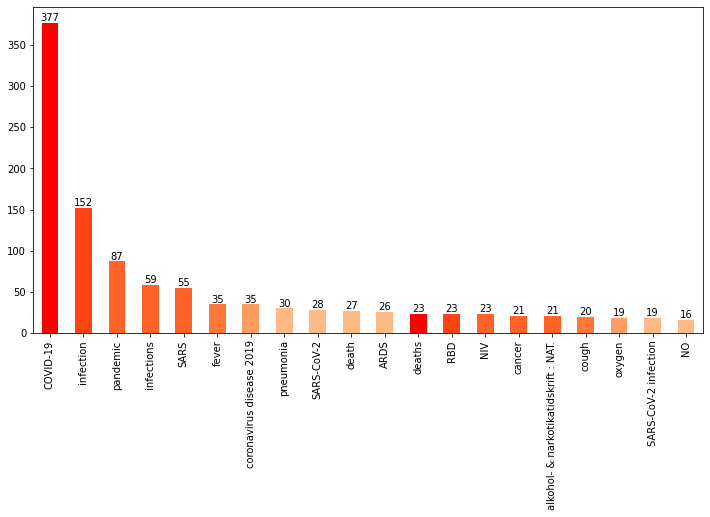

In [35]:
x_labels = [val[0] for val in entity_value_list]
y_labels = [val[1] for val in entity_value_list]
plt.figure(figsize=(12, 6))
ax = pd.Series(y_labels).plot(kind='bar',color=['#ff0000', '#ff4313', '#ff6126', '#ff6126', '#ff6126', '#ff7839', '#ff9c5f', '#ffb985', '#ffb985', '#ffb985', '#ffb985'])
ax.set_xticklabels(x_labels)

rects = ax.patches

for rect, label in zip(rects, y_labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')

## Pie Chart 
### Percentage for the top 20 commonly available entities in the Covid-19 related articles

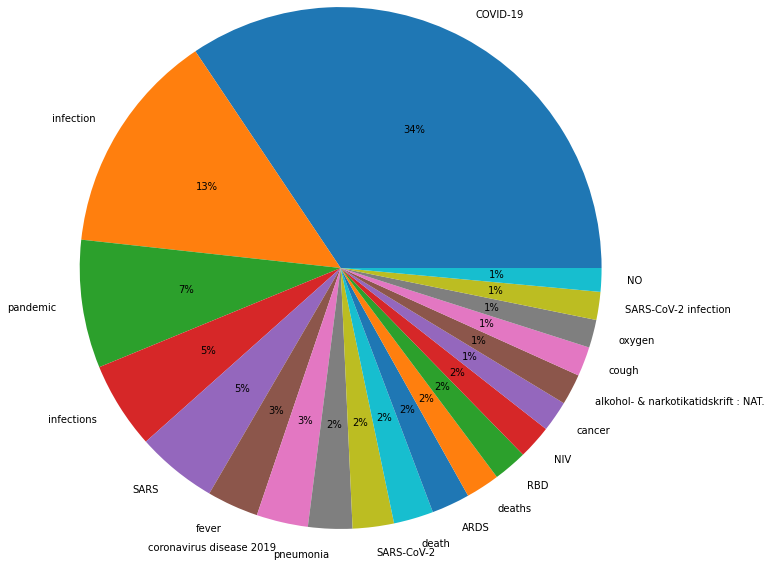

In [36]:
plt.pie(y_labels, labels=x_labels,autopct='%1.1i%%', radius=3)
plt.show()